In [14]:
import os
import pandas as pd
import numpy as np

from math import ceil 
from skimage import io
from skimage import filters, color
from scipy import ndimage as ndi
from PIL import Image
import cv2
import matplotlib
matplotlib.rcParams.update({'figure.max_open_warning': 0})

import processing as proc
import processing_new as newproc

import tensorflow as tf
from tensorflow.keras import layers
keras = tf.keras
AUTOTUNE = tf.data.experimental.AUTOTUNE ## tf.data transformation parameters
import matplotlib.pyplot as plt

In [15]:
!ls saved_models
models = os.popen("ls saved_models").read().split('\n')[:-1]
tf_model = keras.models.load_model('saved_models/'+models[-1])

mnist_5epochs_20191028.h5  mnist_hasyv2_20epochs_201910291572394063.h5


In [16]:
imgs = os.popen("ls testmarker").read().split('\n')[:-1]
for i,img in enumerate(imgs):
    imgs[i]='testmarker/'+img
imgs
# imgs = os.popen("ls generated_imageset").read().split('\n')[:-1]
# for i,img in enumerate(imgs):
#     imgs[i]='generated_imageset/'+img
# imgs

['testmarker/068479.jpg',
 'testmarker/10645.jpg',
 'testmarker/10897649.jpg',
 'testmarker/16786.jpg',
 'testmarker/17662814.jpg',
 'testmarker/2185.jpg',
 'testmarker/22069.jpg',
 'testmarker/22765.jpg',
 'testmarker/236951.jpg',
 'testmarker/26635409.jpg',
 'testmarker/279134.jpg',
 'testmarker/32128957.jpg',
 'testmarker/39385210.jpg',
 'testmarker/46320745.jpg',
 'testmarker/50473.jpg',
 'testmarker/648502.jpg',
 'testmarker/657213.jpg',
 'testmarker/66682.jpg',
 'testmarker/731984.jpg',
 'testmarker/74036776.jpg',
 'testmarker/74430.jpg',
 'testmarker/7493.jpg',
 'testmarker/81064327.jpg',
 'testmarker/84843617.jpg',
 'testmarker/97765113.jpg']

In [17]:
labels = []
for filename in imgs:
    label = []
    for digit in filename.split('/')[1][:-4]:
#         print(digit)
        label.append(int(digit))
    labels.append(label)
labels

[[0, 6, 8, 4, 7, 9],
 [1, 0, 6, 4, 5],
 [1, 0, 8, 9, 7, 6, 4, 9],
 [1, 6, 7, 8, 6],
 [1, 7, 6, 6, 2, 8, 1, 4],
 [2, 1, 8, 5],
 [2, 2, 0, 6, 9],
 [2, 2, 7, 6, 5],
 [2, 3, 6, 9, 5, 1],
 [2, 6, 6, 3, 5, 4, 0, 9],
 [2, 7, 9, 1, 3, 4],
 [3, 2, 1, 2, 8, 9, 5, 7],
 [3, 9, 3, 8, 5, 2, 1, 0],
 [4, 6, 3, 2, 0, 7, 4, 5],
 [5, 0, 4, 7, 3],
 [6, 4, 8, 5, 0, 2],
 [6, 5, 7, 2, 1, 3],
 [6, 6, 6, 8, 2],
 [7, 3, 1, 9, 8, 4],
 [7, 4, 0, 3, 6, 7, 7, 6],
 [7, 4, 4, 3, 0],
 [7, 4, 9, 3],
 [8, 1, 0, 6, 4, 3, 2, 7],
 [8, 4, 8, 4, 3, 6, 1, 7],
 [9, 7, 7, 6, 5, 1, 1, 3]]

In [18]:
df = pd.DataFrame(imgs)
df.columns = ['filename']
df['label'] = labels
# df.to_csv('prepared_labels.csv',index=False)

In [19]:
# prepared = df.as_matrix()
df_subset = df.copy()     #.iloc[:1000]
df_subset

filename                     label
0     testmarker/068479.jpg        [0, 6, 8, 4, 7, 9]
1      testmarker/10645.jpg           [1, 0, 6, 4, 5]
2   testmarker/10897649.jpg  [1, 0, 8, 9, 7, 6, 4, 9]
3      testmarker/16786.jpg           [1, 6, 7, 8, 6]
4   testmarker/17662814.jpg  [1, 7, 6, 6, 2, 8, 1, 4]
5       testmarker/2185.jpg              [2, 1, 8, 5]
6      testmarker/22069.jpg           [2, 2, 0, 6, 9]
7      testmarker/22765.jpg           [2, 2, 7, 6, 5]
8     testmarker/236951.jpg        [2, 3, 6, 9, 5, 1]
9   testmarker/26635409.jpg  [2, 6, 6, 3, 5, 4, 0, 9]
10    testmarker/279134.jpg        [2, 7, 9, 1, 3, 4]
11  testmarker/32128957.jpg  [3, 2, 1, 2, 8, 9, 5, 7]
12  testmarker/39385210.jpg  [3, 9, 3, 8, 5, 2, 1, 0]
13  testmarker/46320745.jpg  [4, 6, 3, 2, 0, 7, 4, 5]
14     testmarker/50473.jpg           [5, 0, 4, 7, 3]
15    testmarker/648502.jpg        [6, 4, 8, 5, 0, 2]
16    testmarker/657213.jpg        [6, 5, 7, 2, 1, 3]
17     testmarker/66682.jpg           [6, 6, 6, 8, 2]
18    testmarker/731984.jpg        [7, 3, 1, 9, 8, 4]
19  testmarker/74036776.jpg  [7, 4, 0, 3, 6, 7, 7, 6]
20     testmarker/74430.jpg           [7, 4, 4, 3, 0]
21      testmarker/7493.jpg              [7, 4, 9, 3]
22  testmarker/81064327.jpg  [8, 1, 0, 6, 4, 3, 2, 7]
23  testmarker/84843617.jpg  [8, 4, 8, 4, 3, 6, 1, 7]
24  testmarker/97765113.jpg  [9, 7, 7, 6, 5, 1, 1, 3]

1 of 25
processing  testmarker/068479.jpg
[0, 6, 8, 4, 7, 9]; [0, 0, 6, 3, 4, 5, 7]

2 of 25
processing  testmarker/10645.jpg
[1, 0, 6, 4, 5]; [1, 0, 6, 4, 5, 6]

3 of 25
processing  testmarker/10897649.jpg
[1, 0, 8, 9, 7, 6, 4, 9]; [1, 0, 8, 9, 9, 6, 4, 9]

4 of 25
processing  testmarker/16786.jpg
[1, 6, 7, 8, 6]; [1, 6, 7, 8, 6]

5 of 25
processing  testmarker/17662814.jpg
[1, 7, 6, 6, 2, 8, 1, 4]; [1, 7, 6, 6, 2, 8, 1, 4]

6 of 25
processing  testmarker/2185.jpg
[2, 1, 8, 5]; [4, 4, 2, 4, 1, 8, 5]

7 of 25
processing  testmarker/22069.jpg
[2, 2, 0, 6, 9]; [2, 0, 2, 0, 6, 9]

8 of 25
processing  testmarker/22765.jpg
[2, 2, 7, 6, 5]; [2, 2, 7, 0, 6, 0, 5]

9 of 25
processing  testmarker/236951.jpg
[2, 3, 6, 9, 5, 1]; [1, 3, 6, 9, 5, 1]

10 of 25
processing  testmarker/26635409.jpg
[2, 6, 6, 3, 5, 4, 0, 9]; [2, 6, 6, 3, 5, 4, 0, 9]

11 of 25
processing  testmarker/279134.jpg
[2, 7, 9, 1, 3, 4]; [2, 7, 4, 0, 3, 4]

12 of 25
processing  testmarker/32128957.jpg
[3, 2, 1, 2, 8, 9, 5, 7]; [

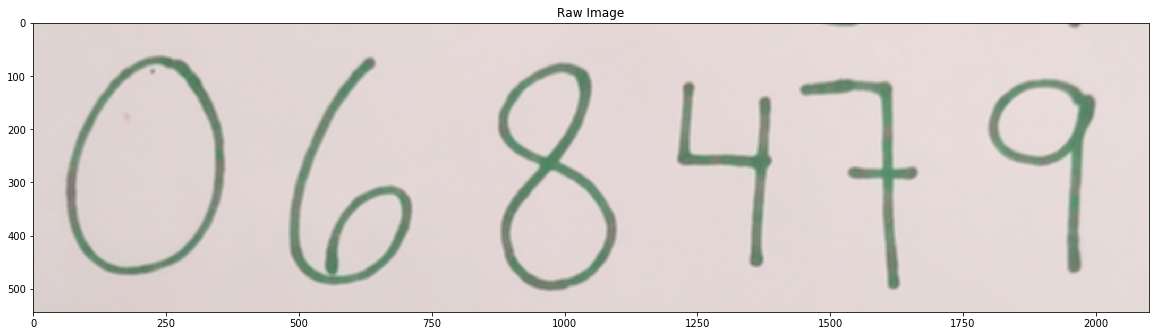

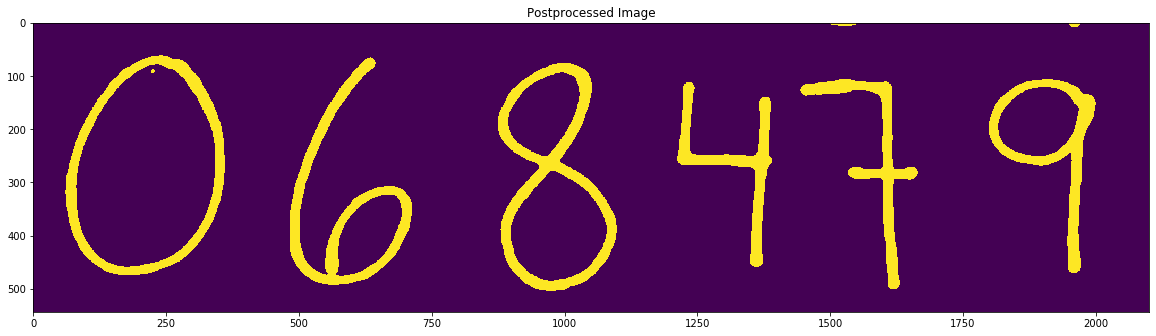

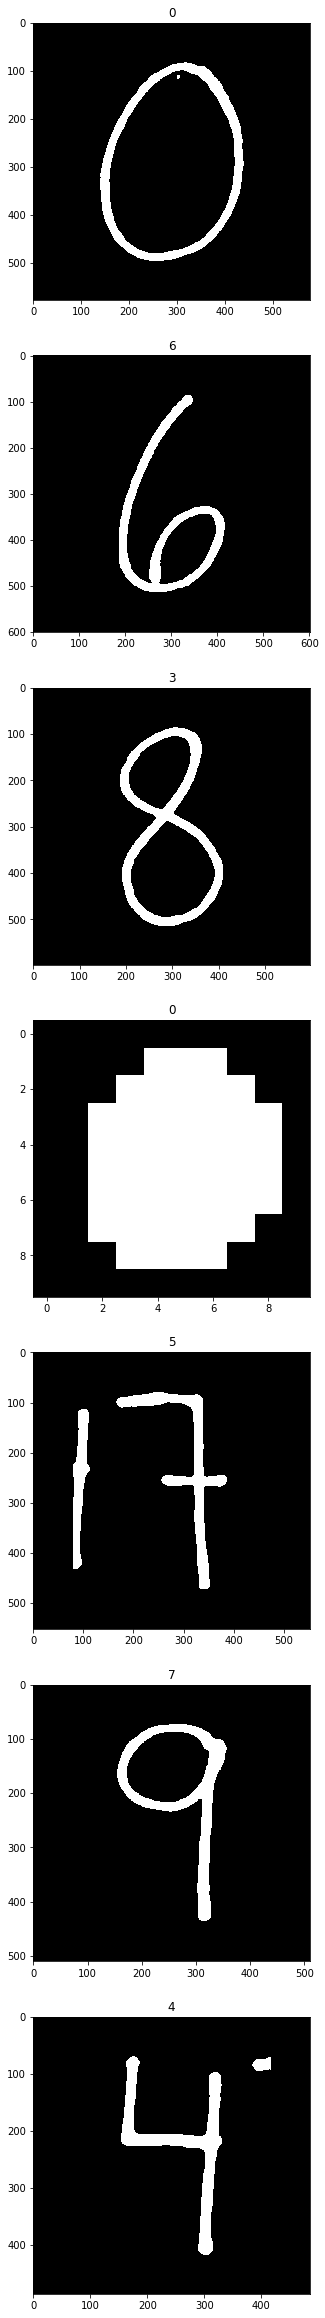

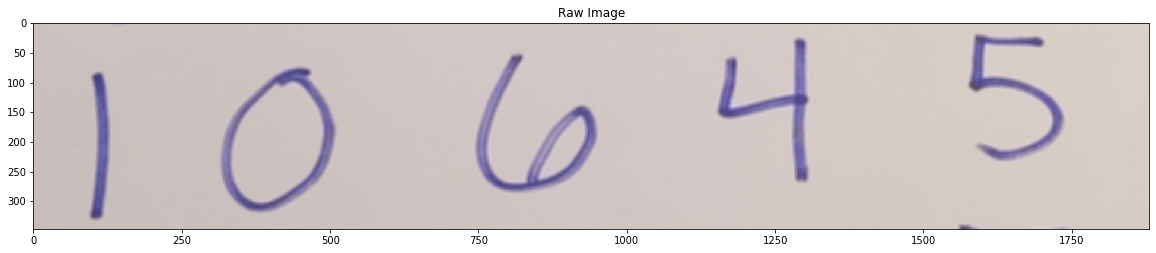

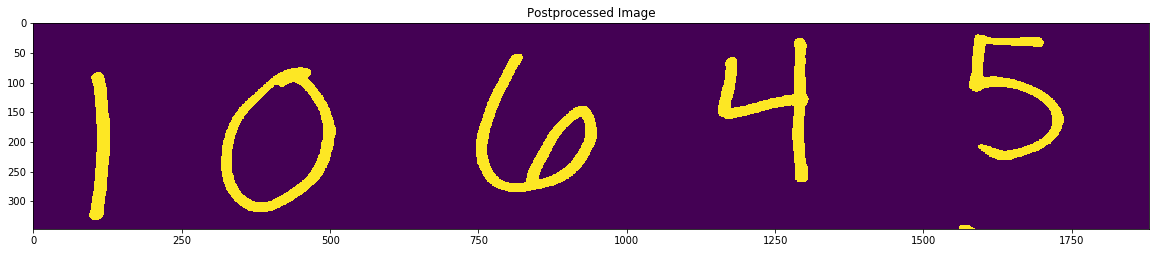

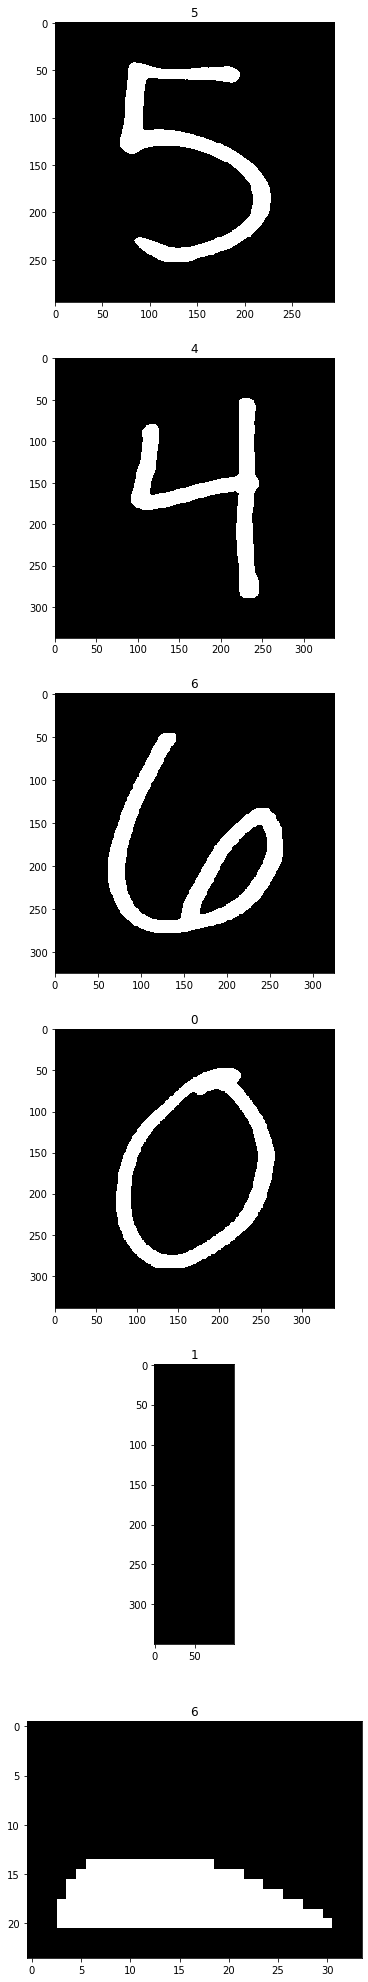

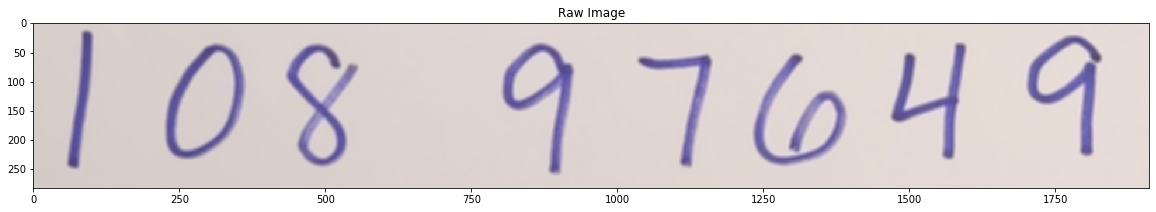

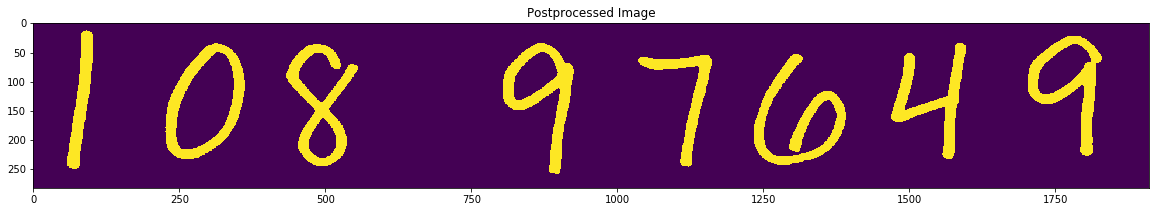

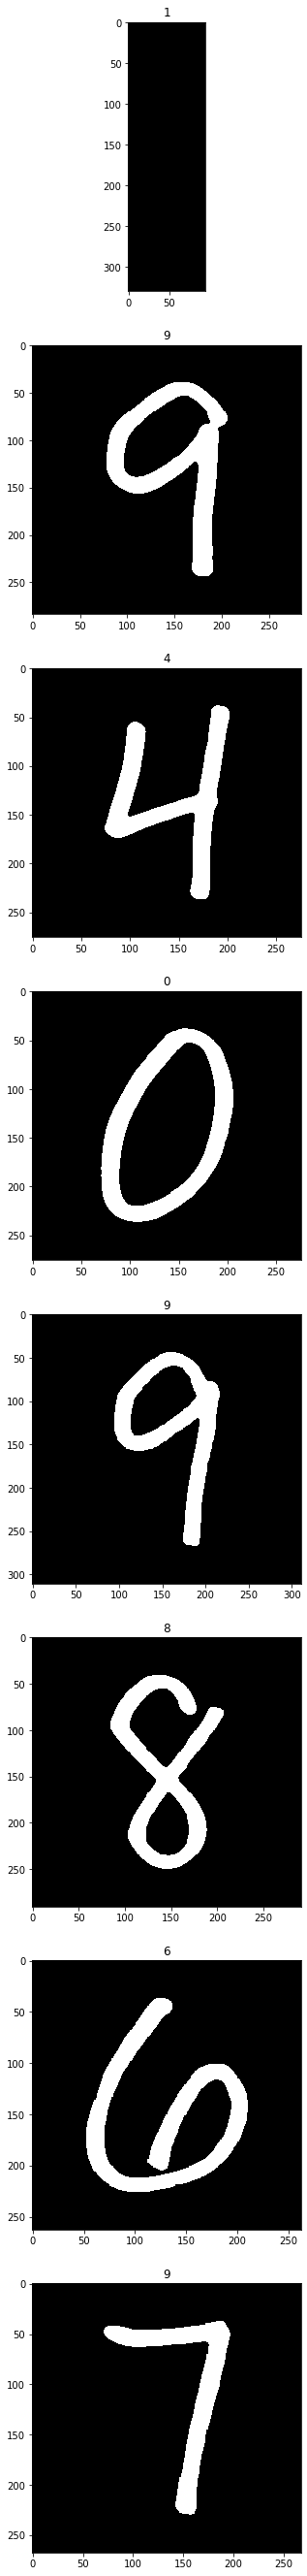

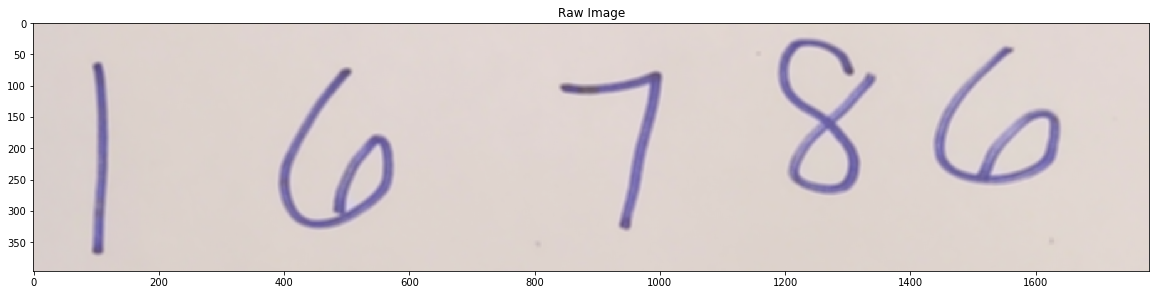

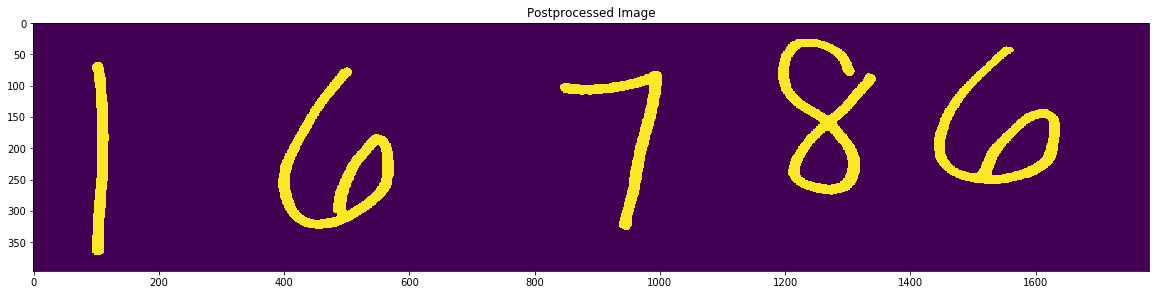

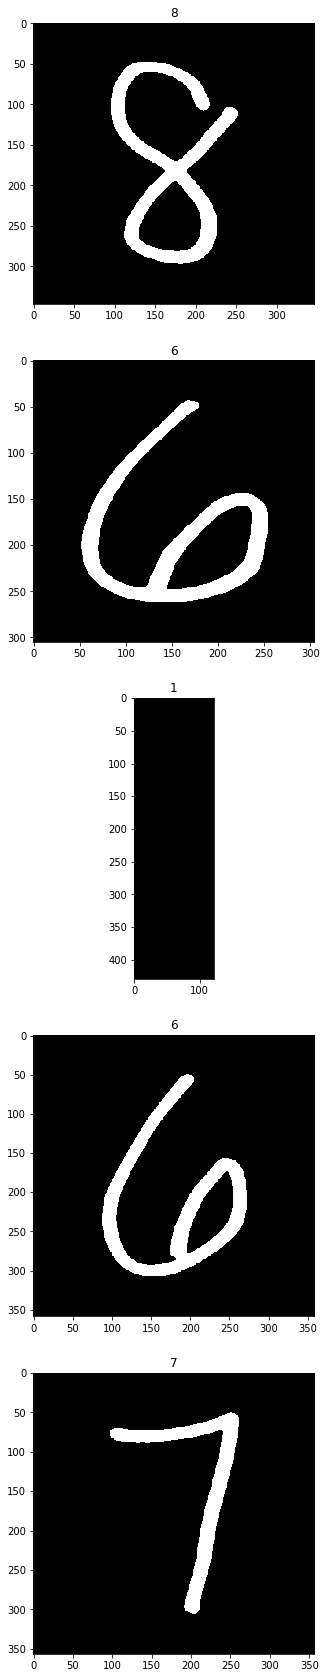

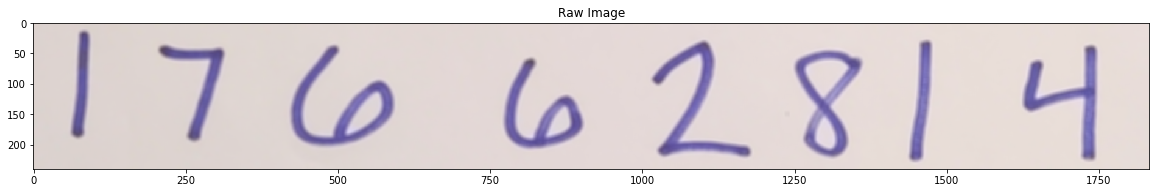

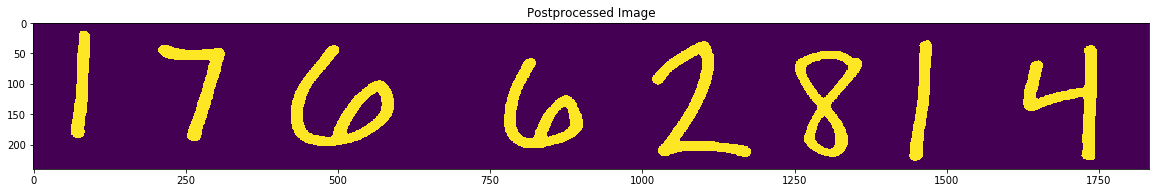

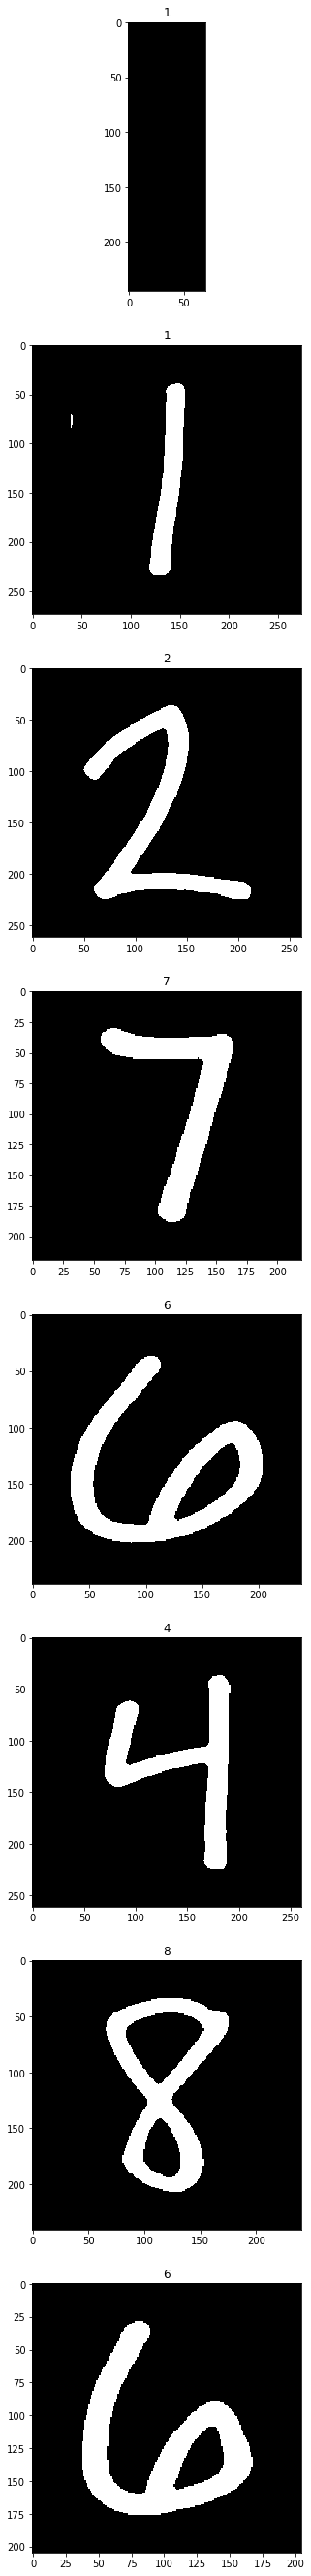

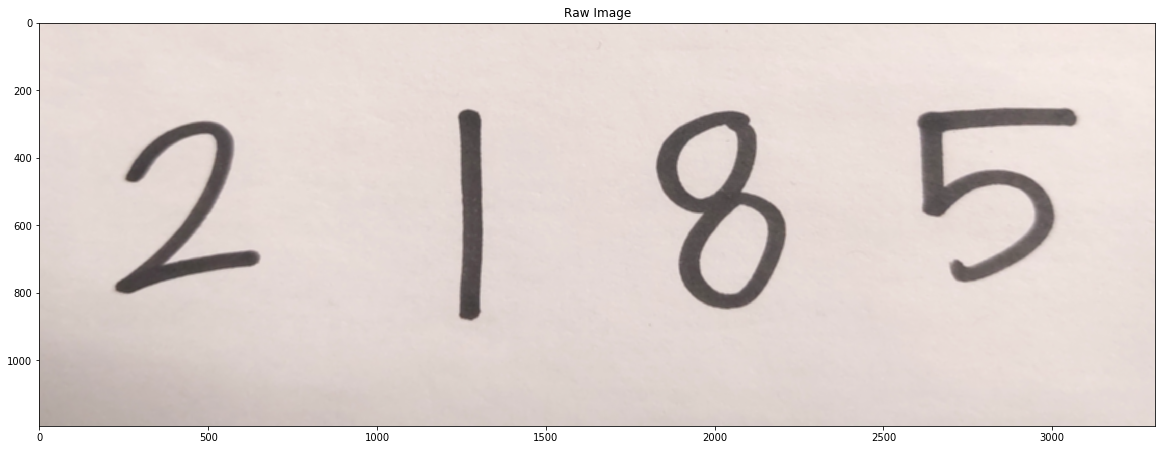

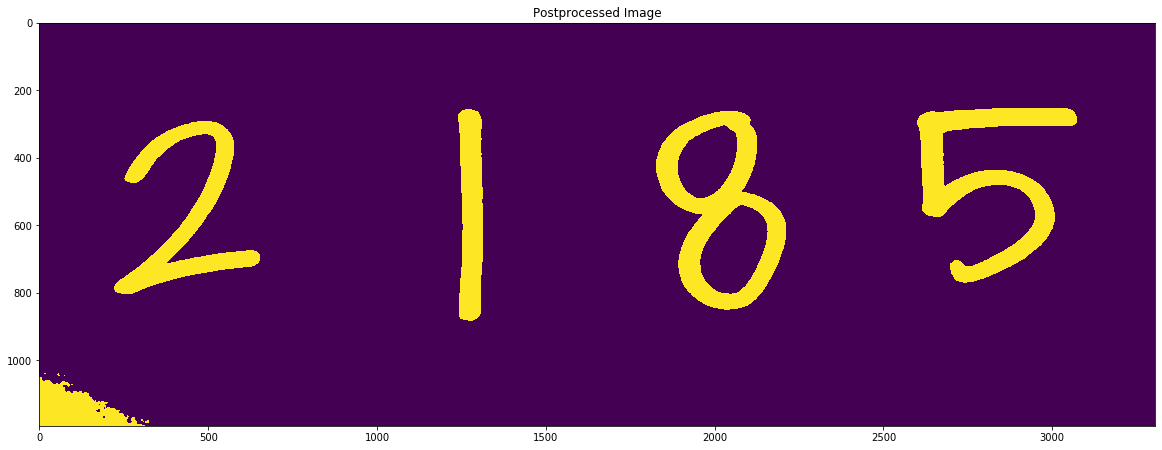

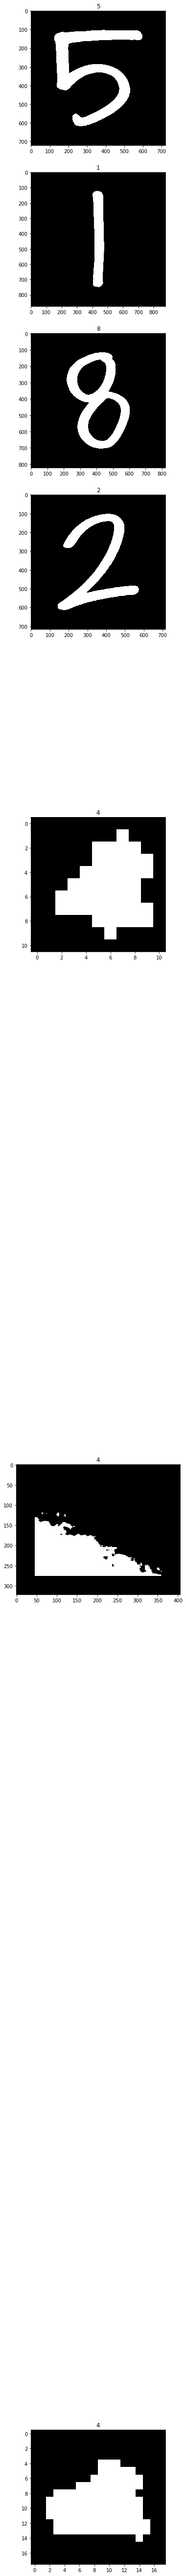

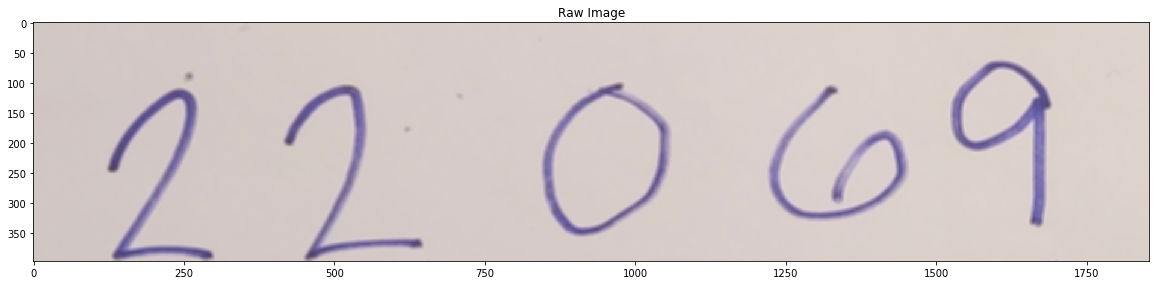

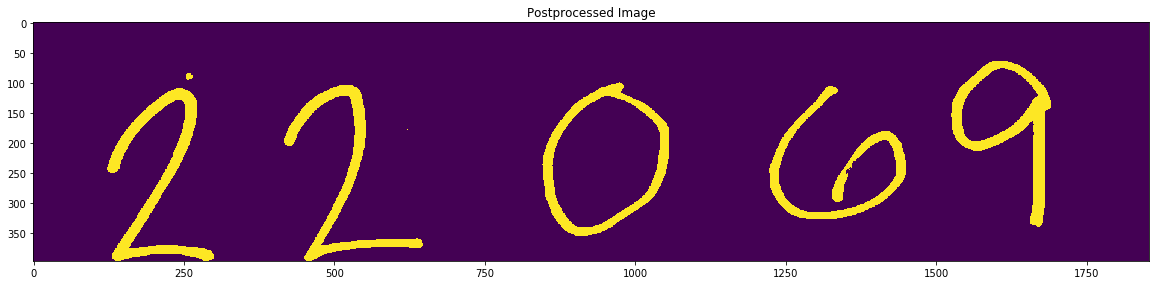

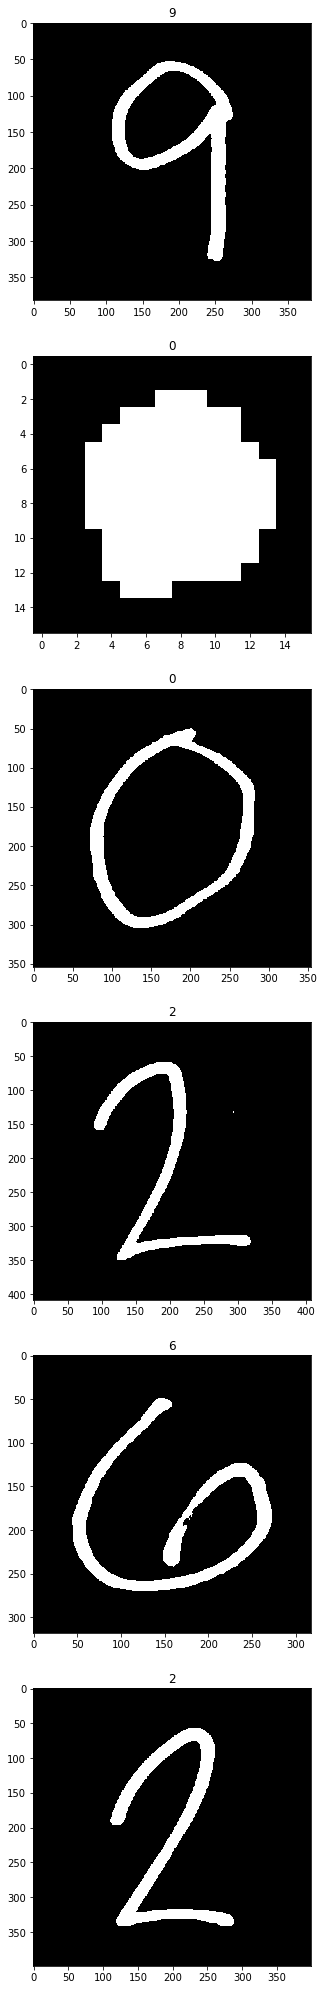

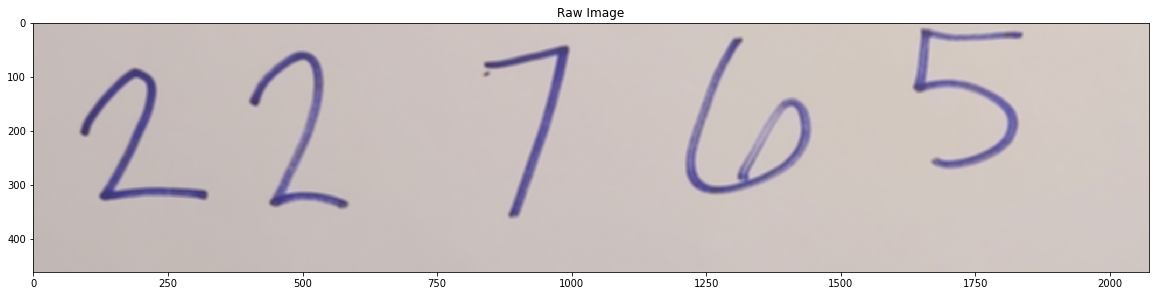

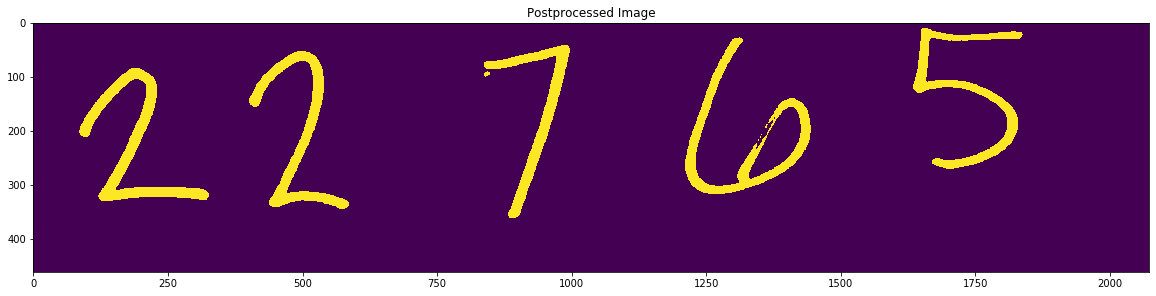

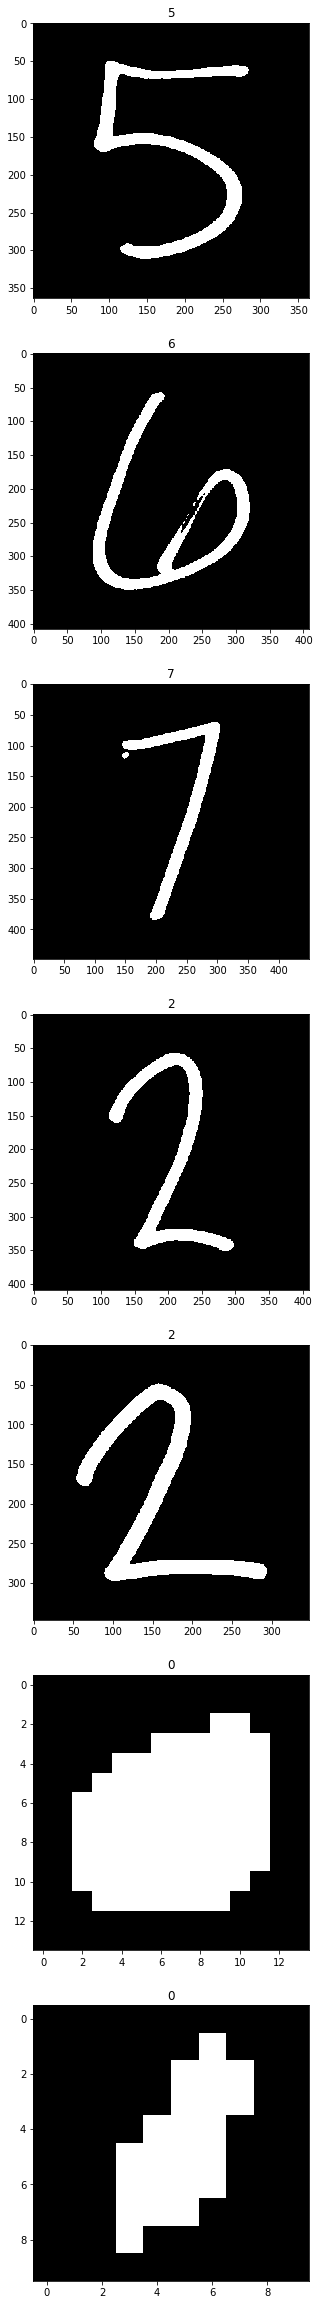

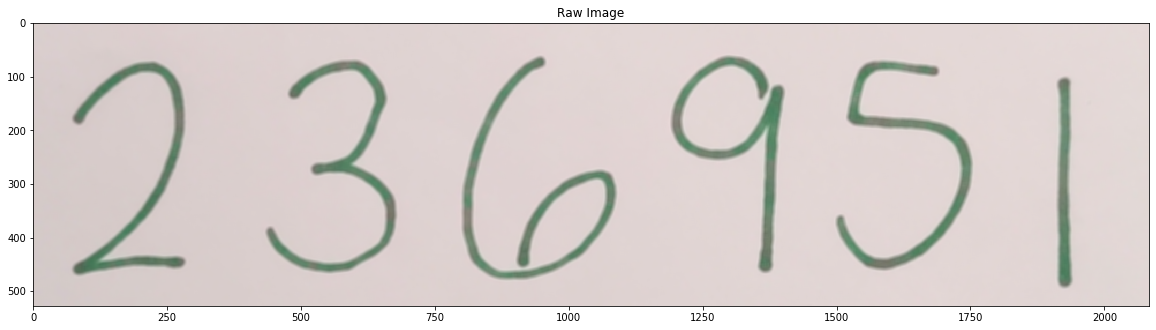

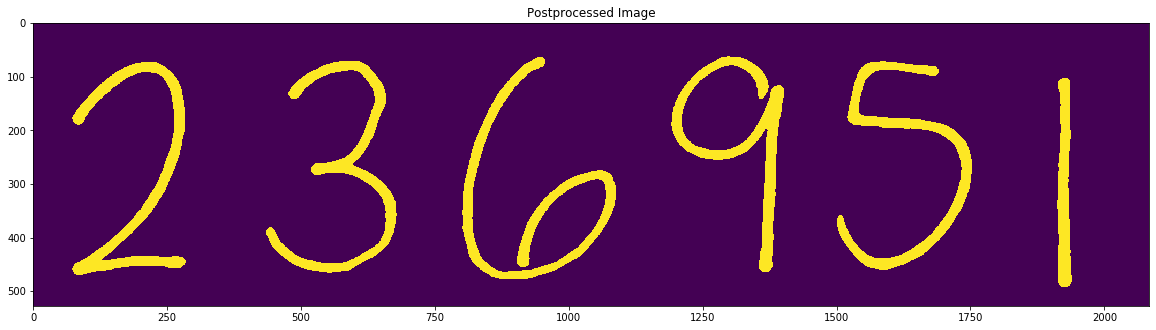

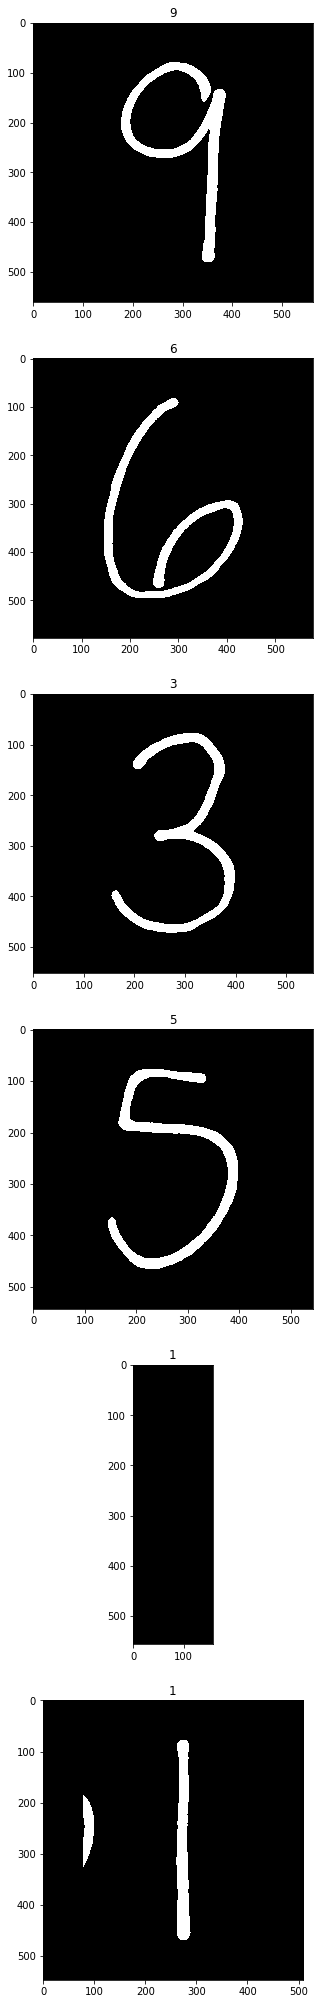

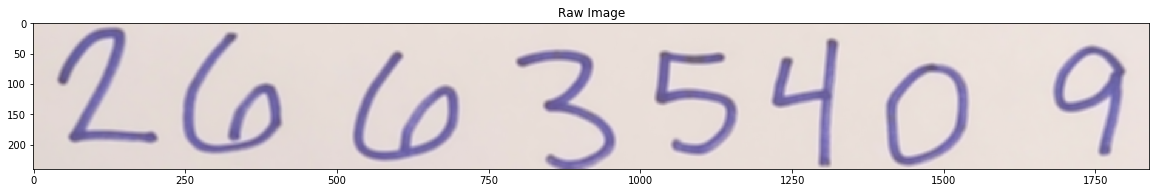

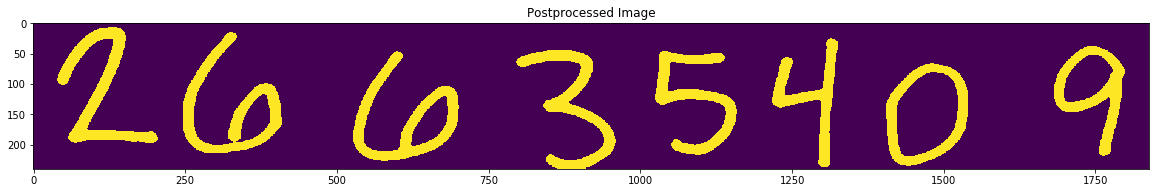

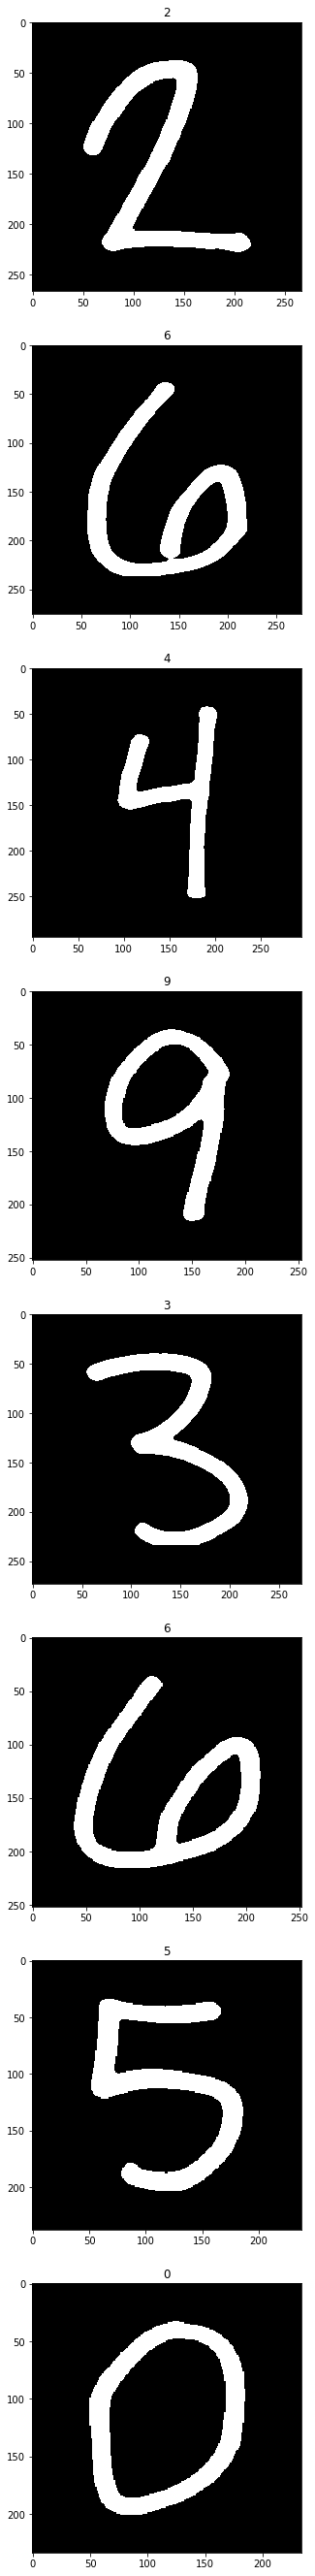

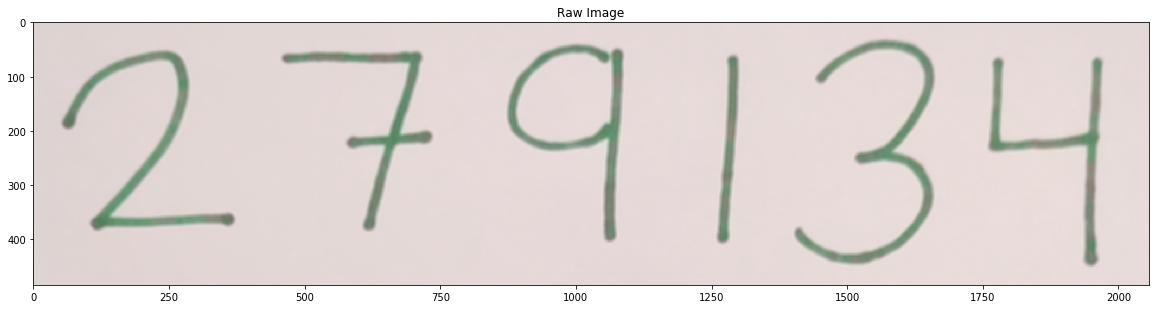

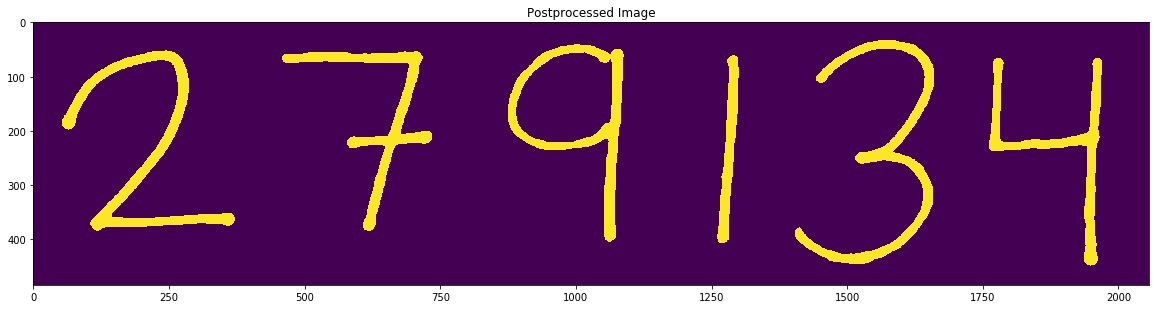

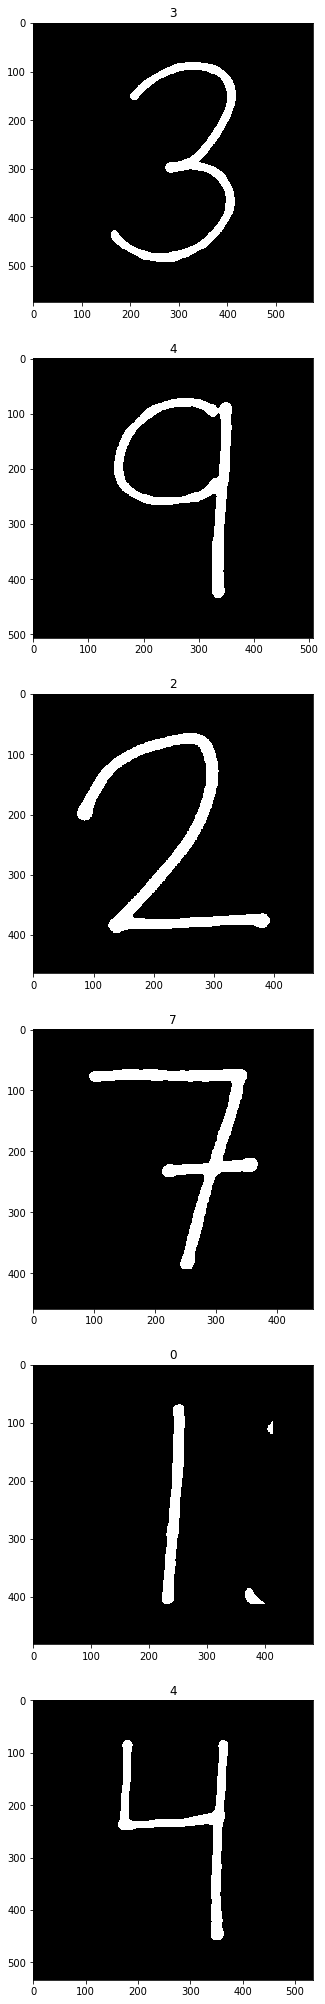

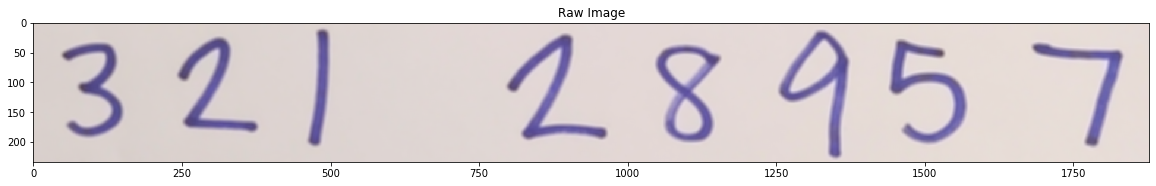

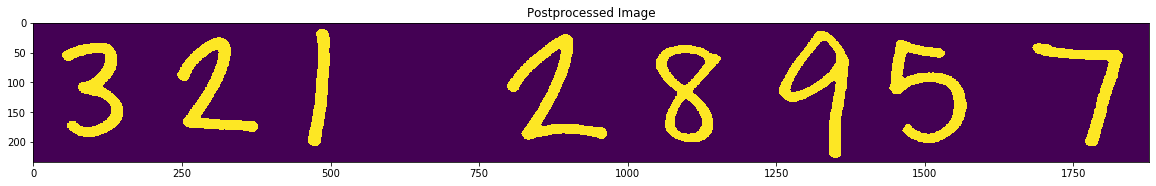

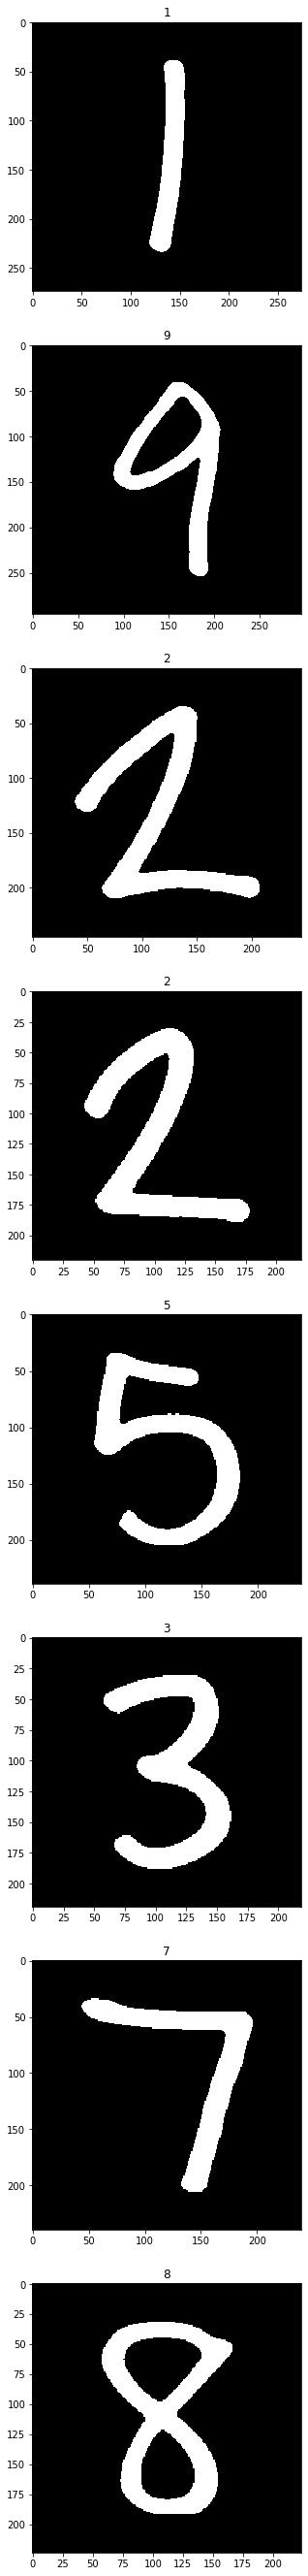

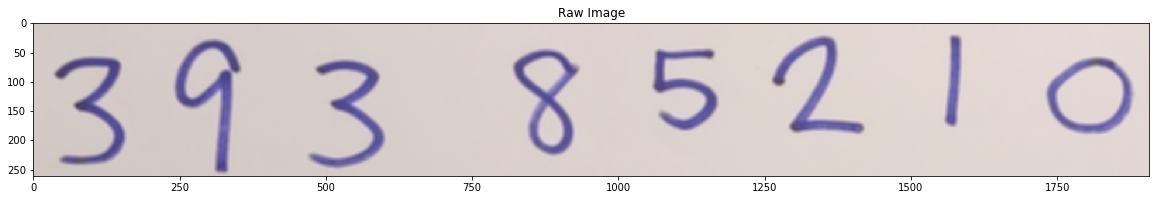

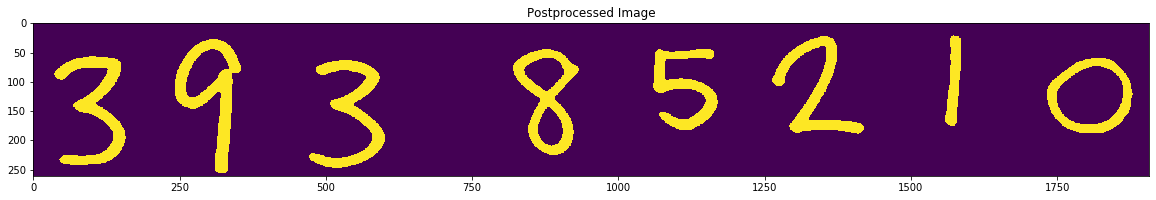

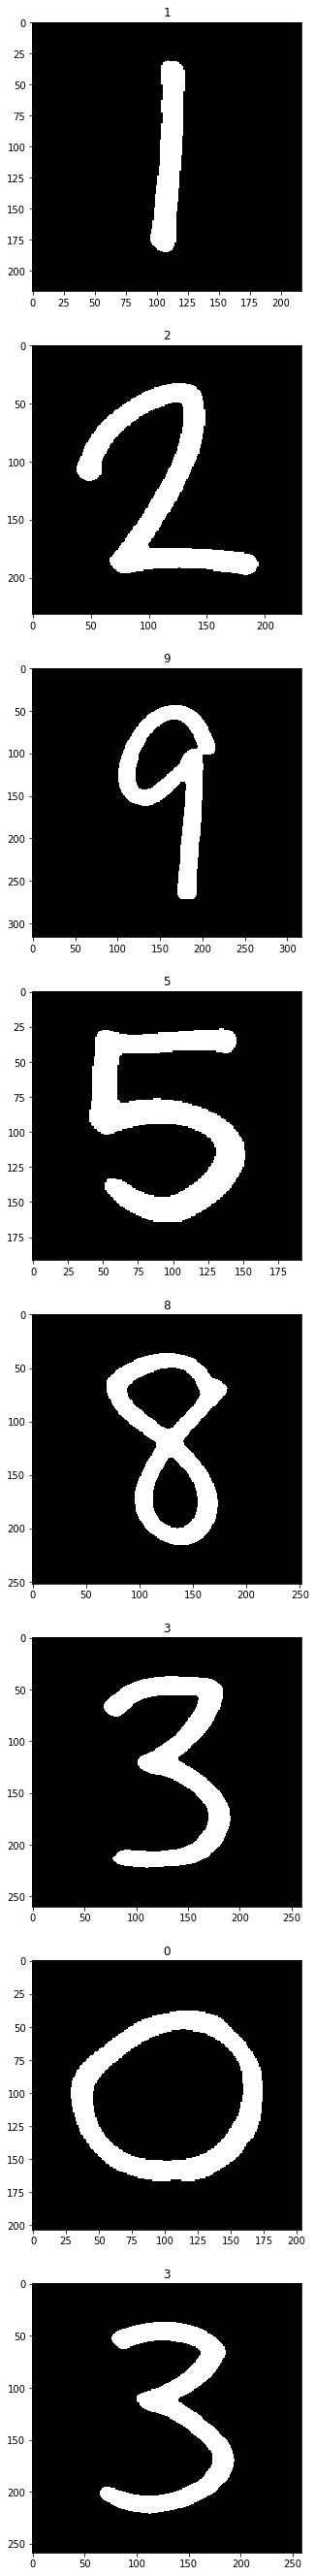

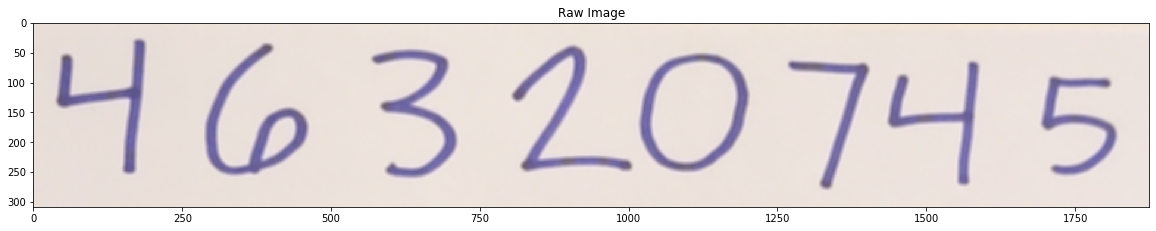

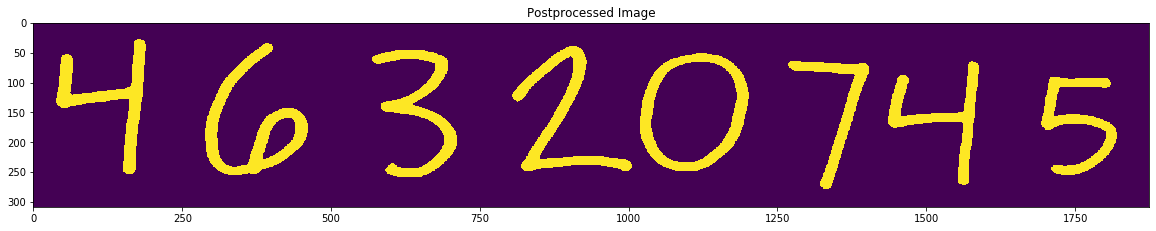

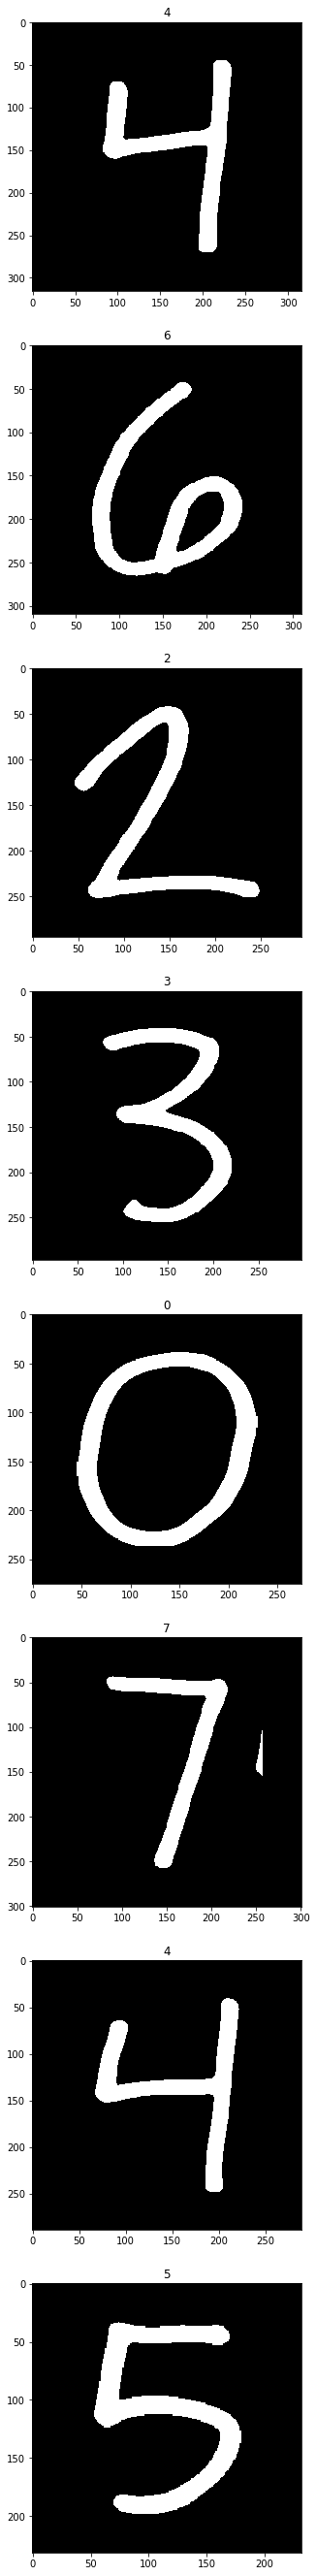

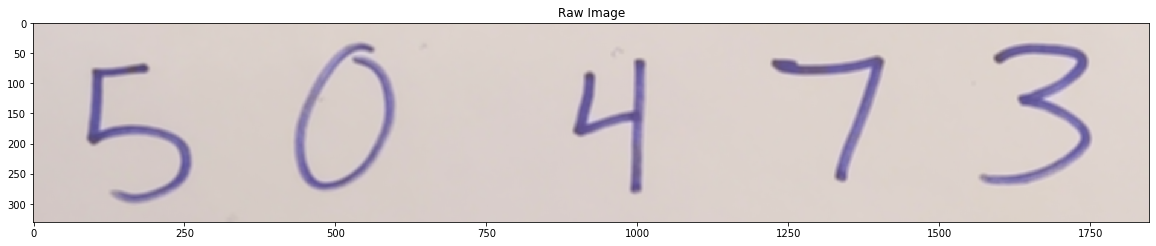

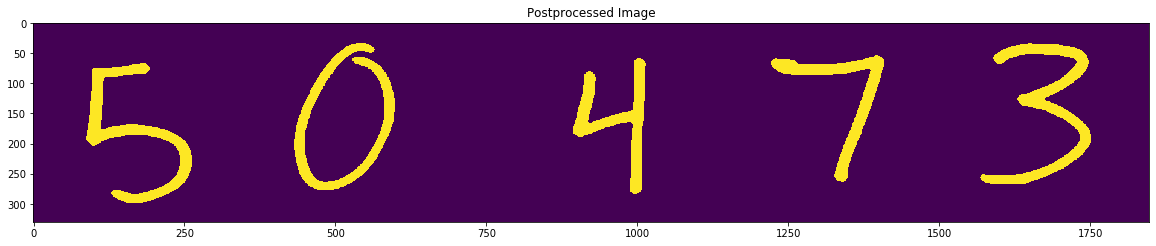

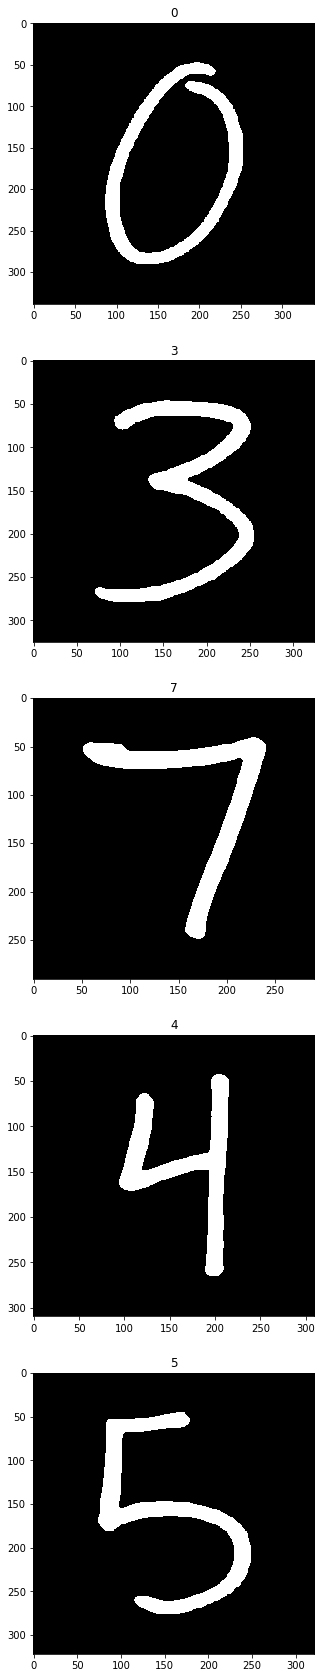

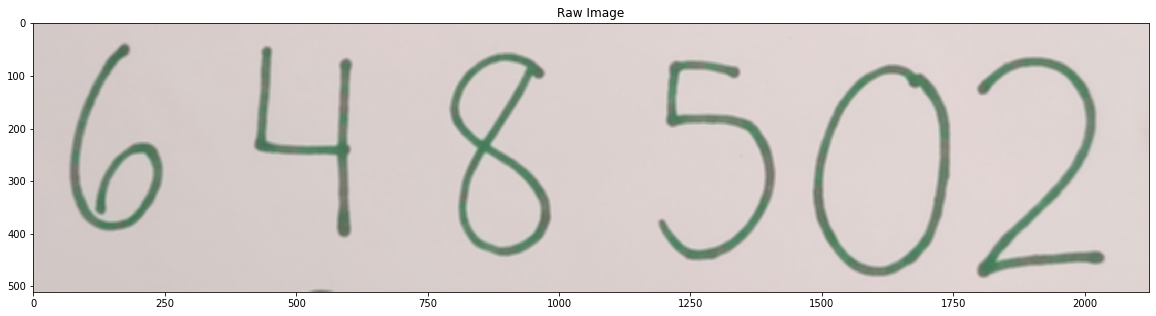

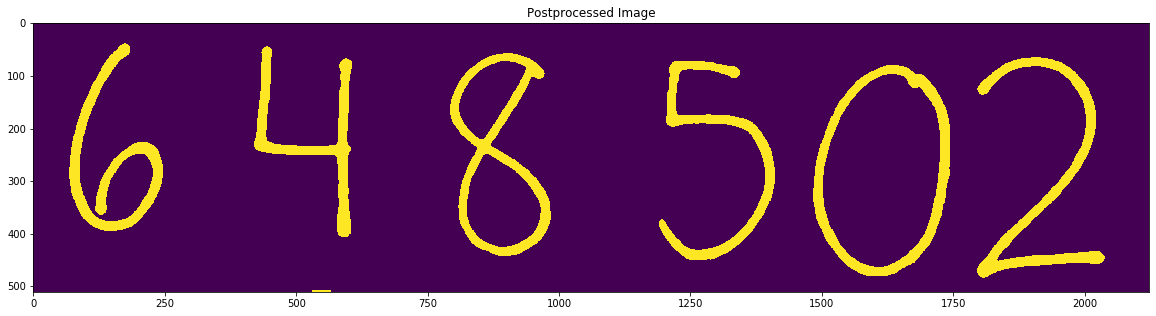

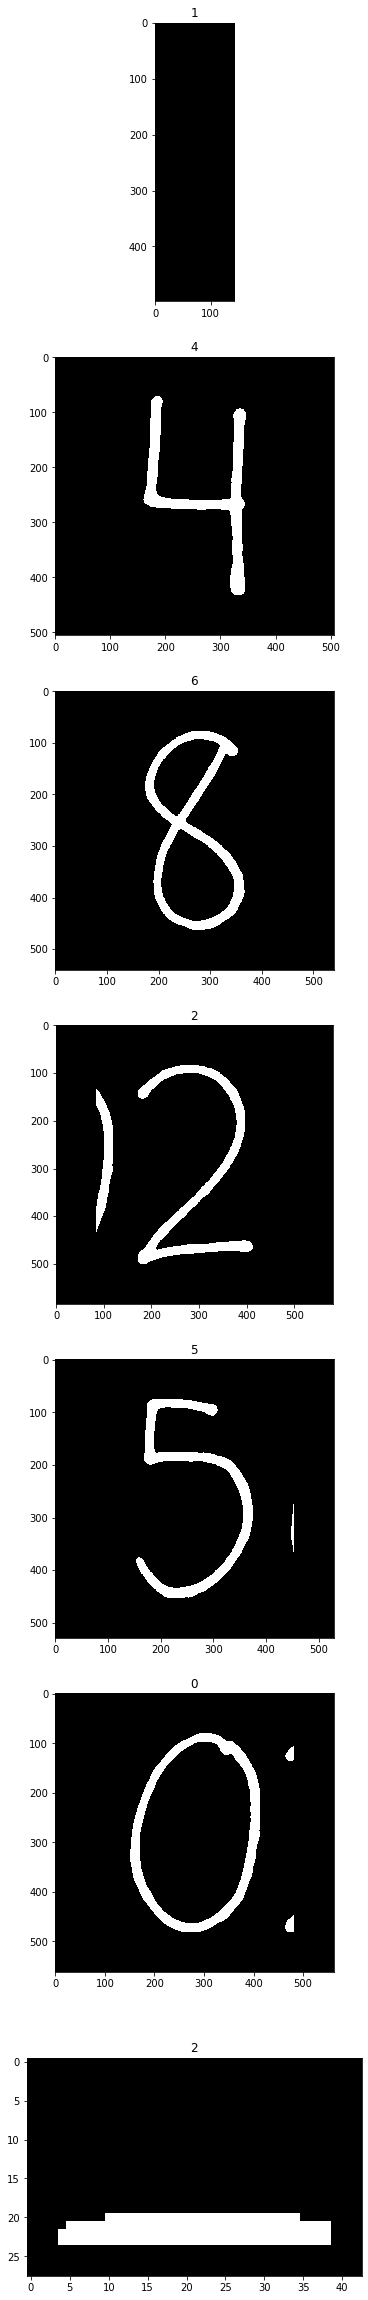

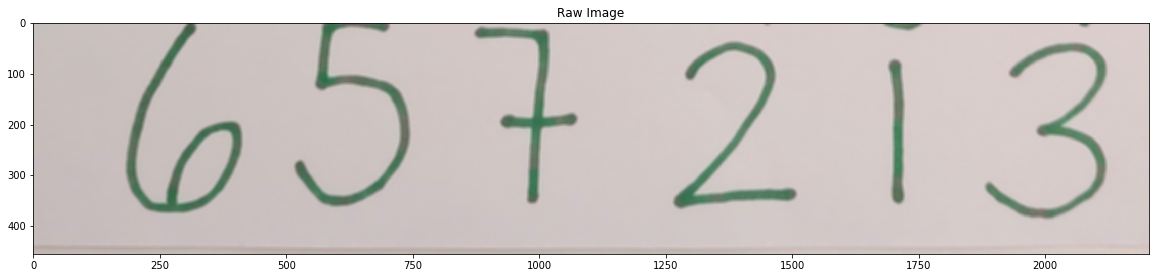

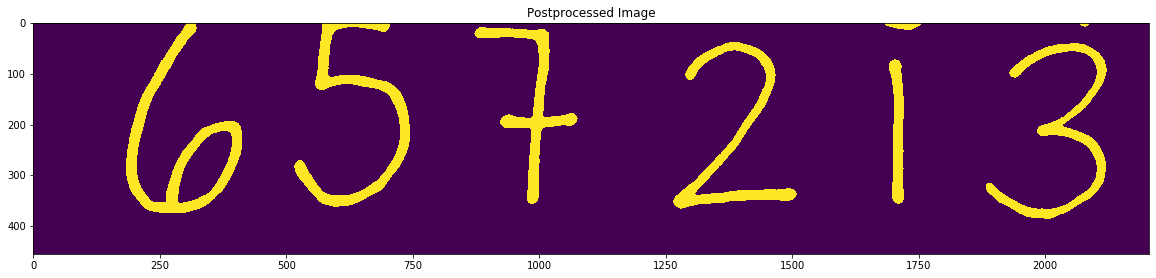

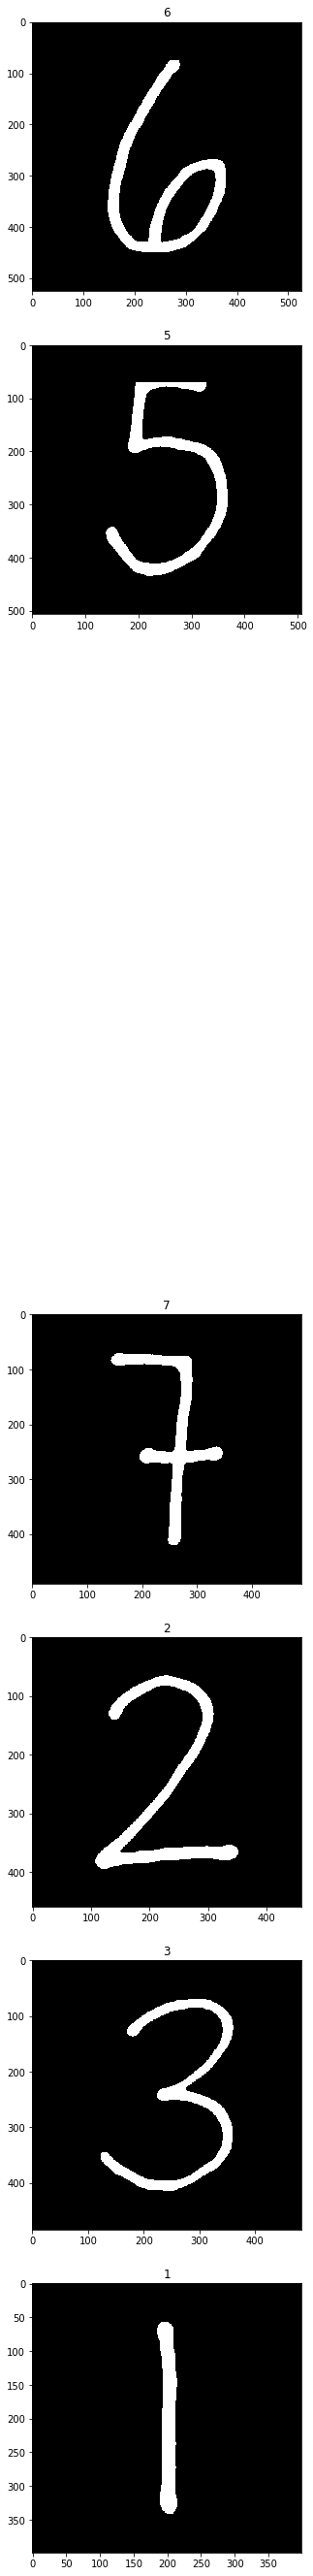

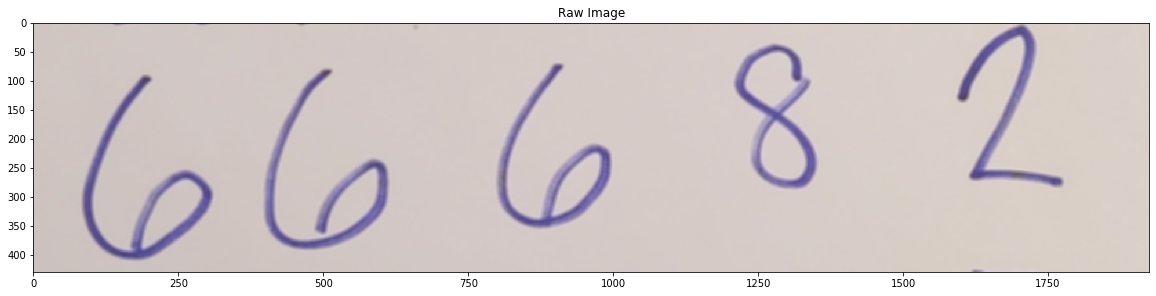

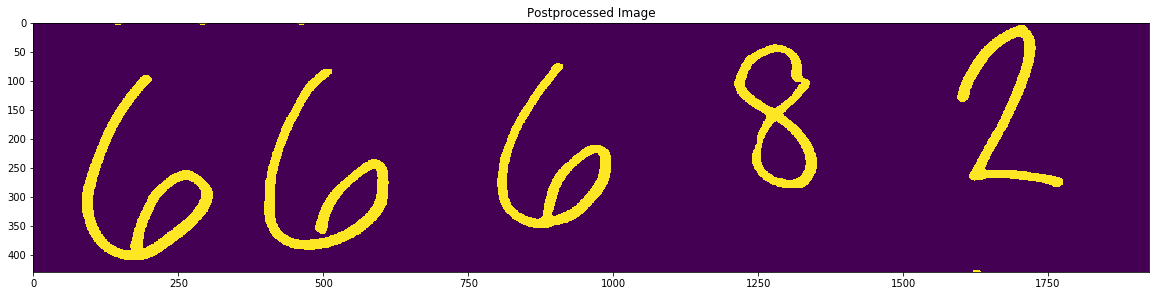

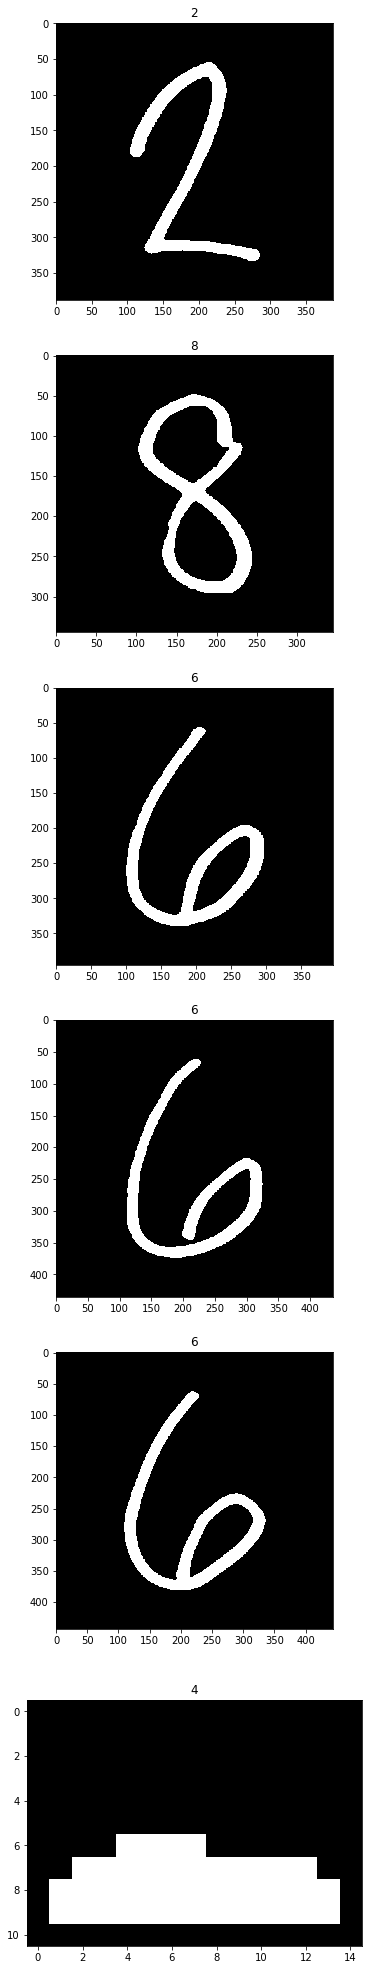

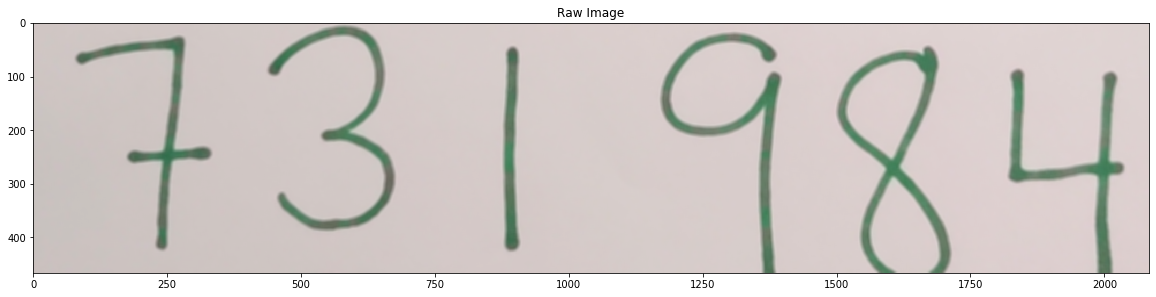

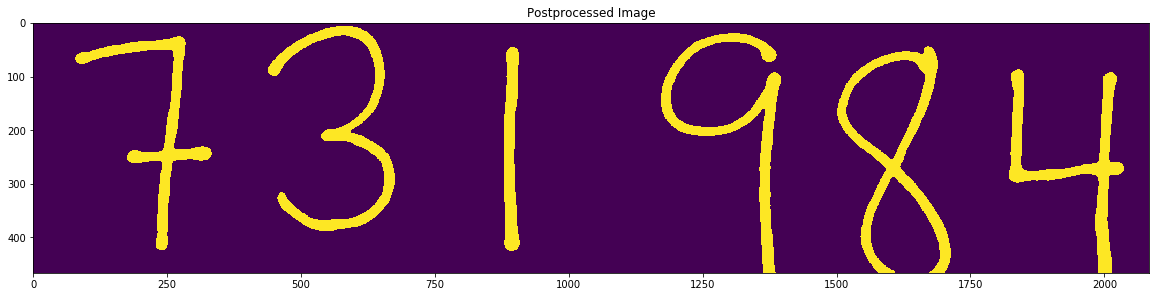

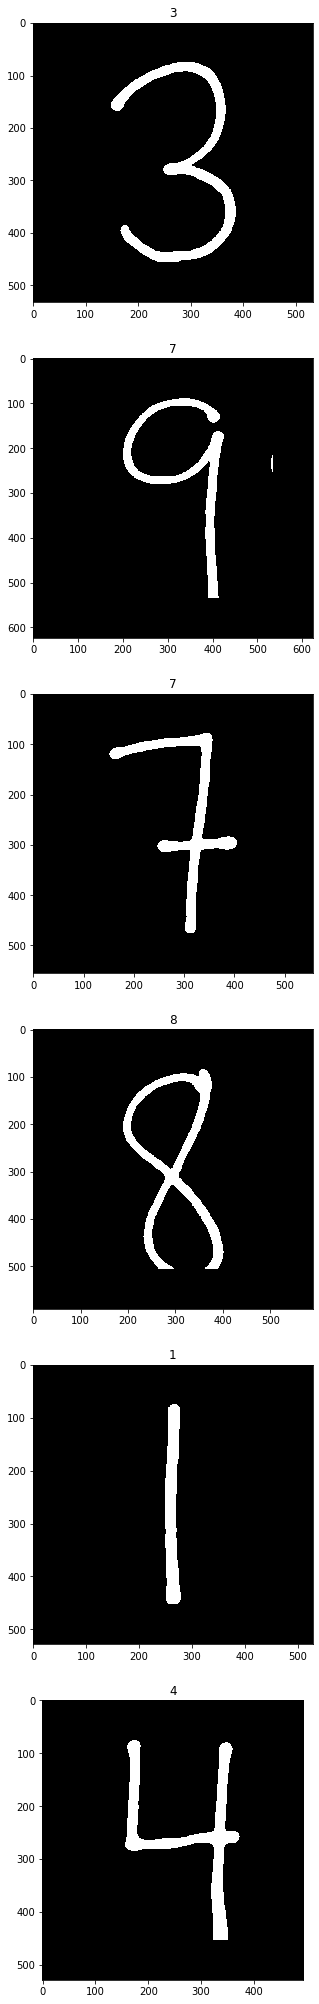

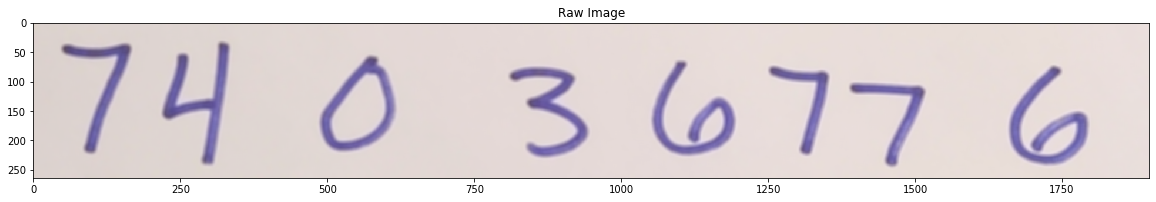

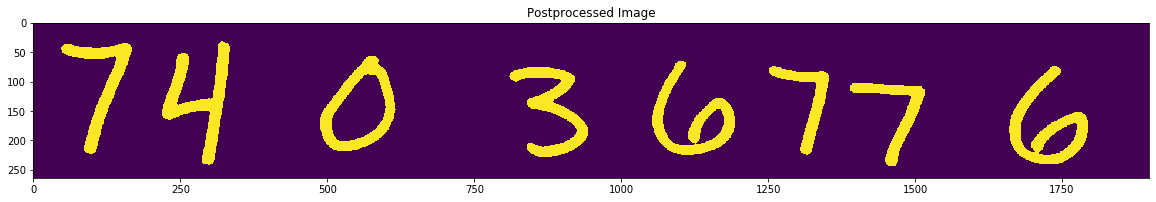

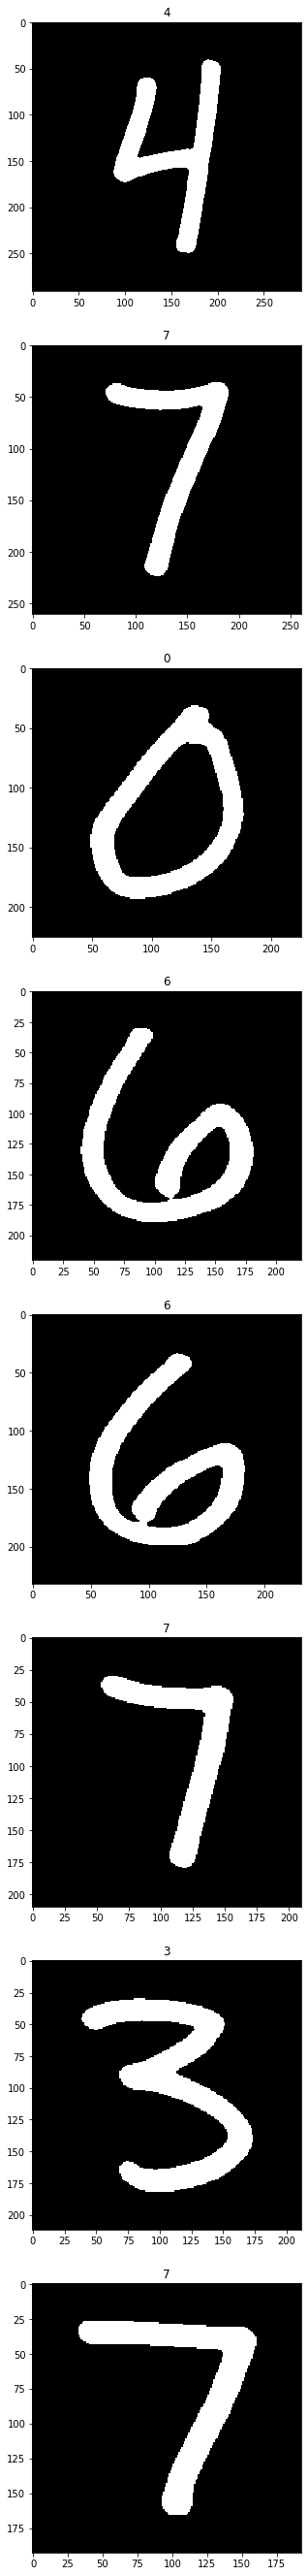

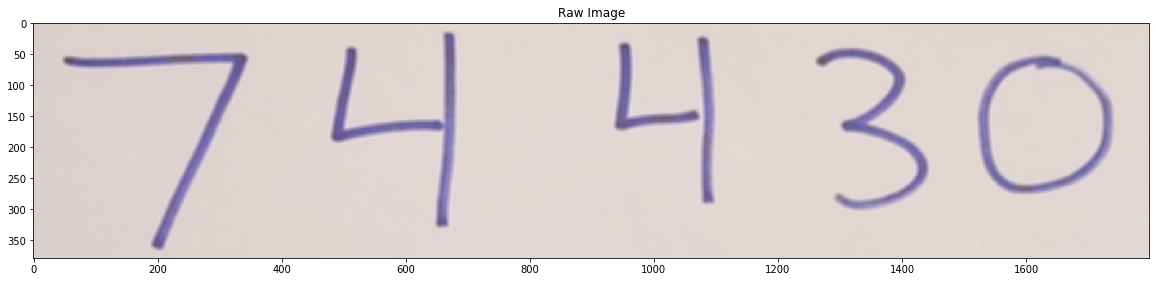

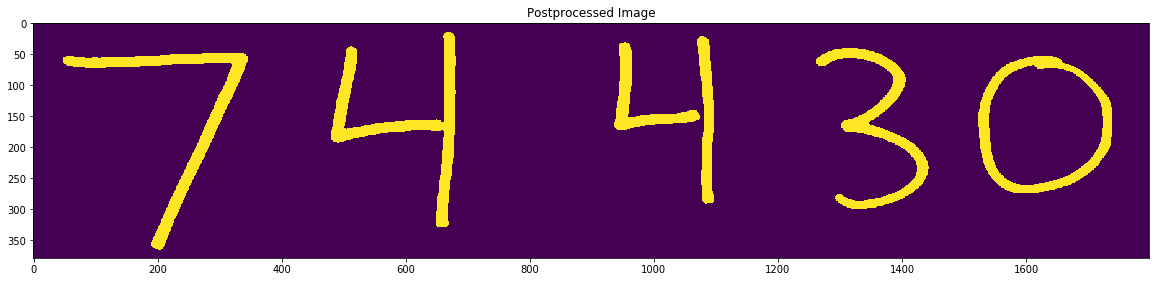

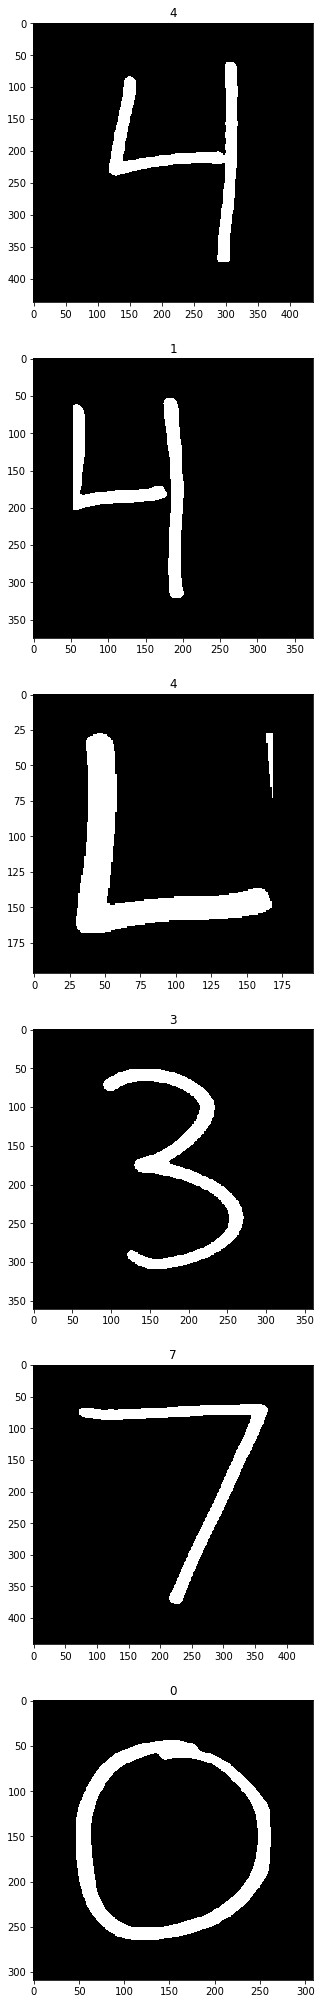

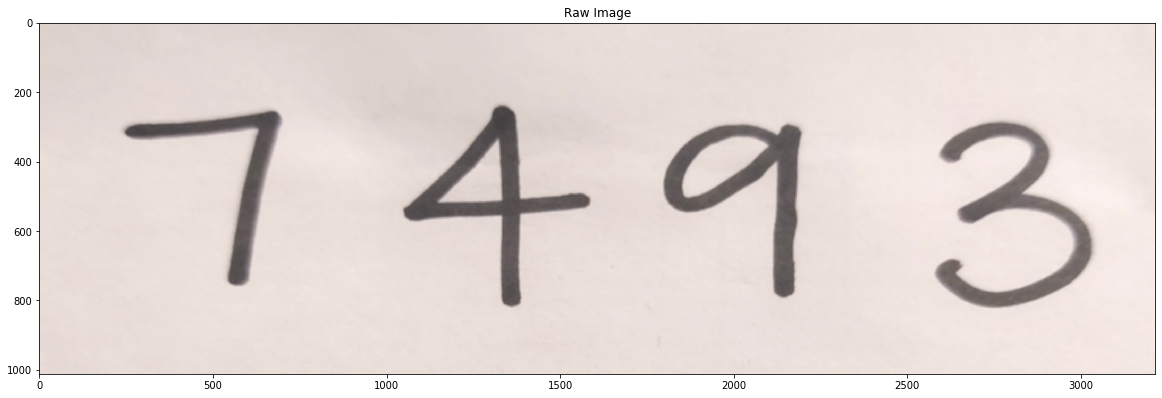

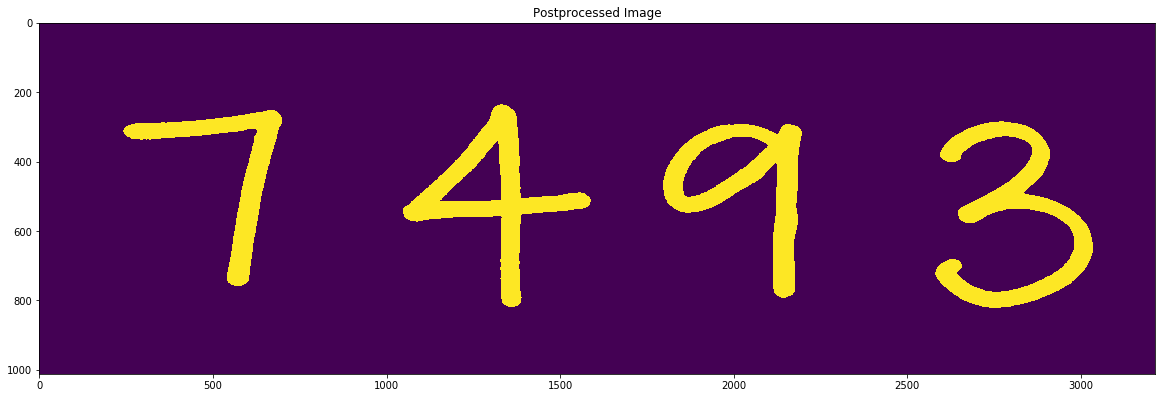

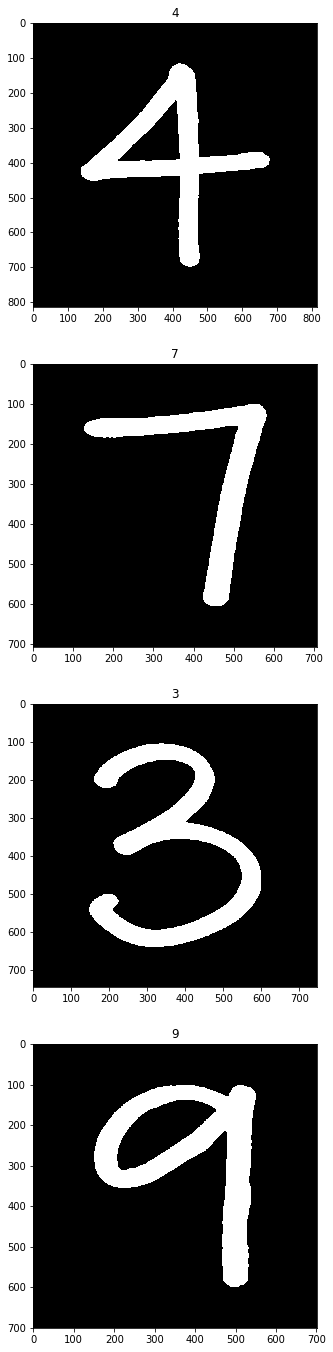

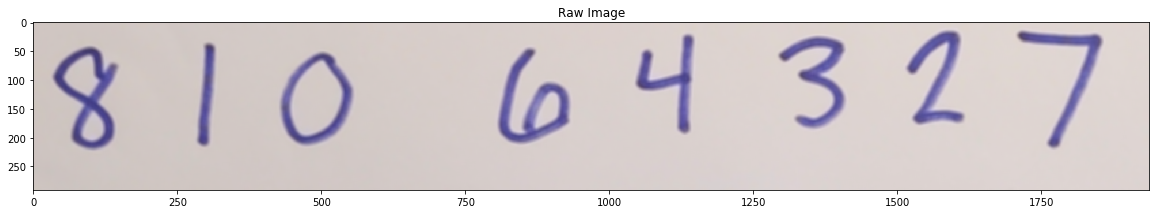

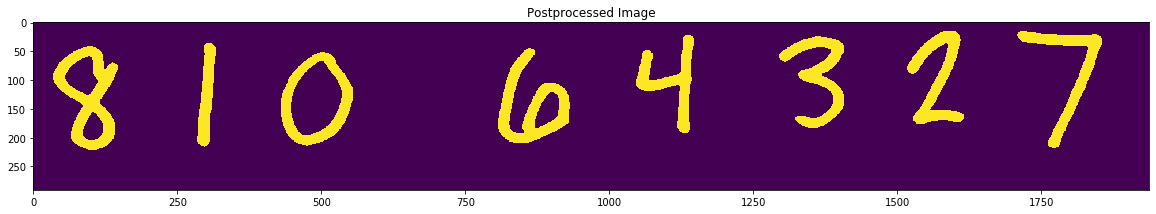

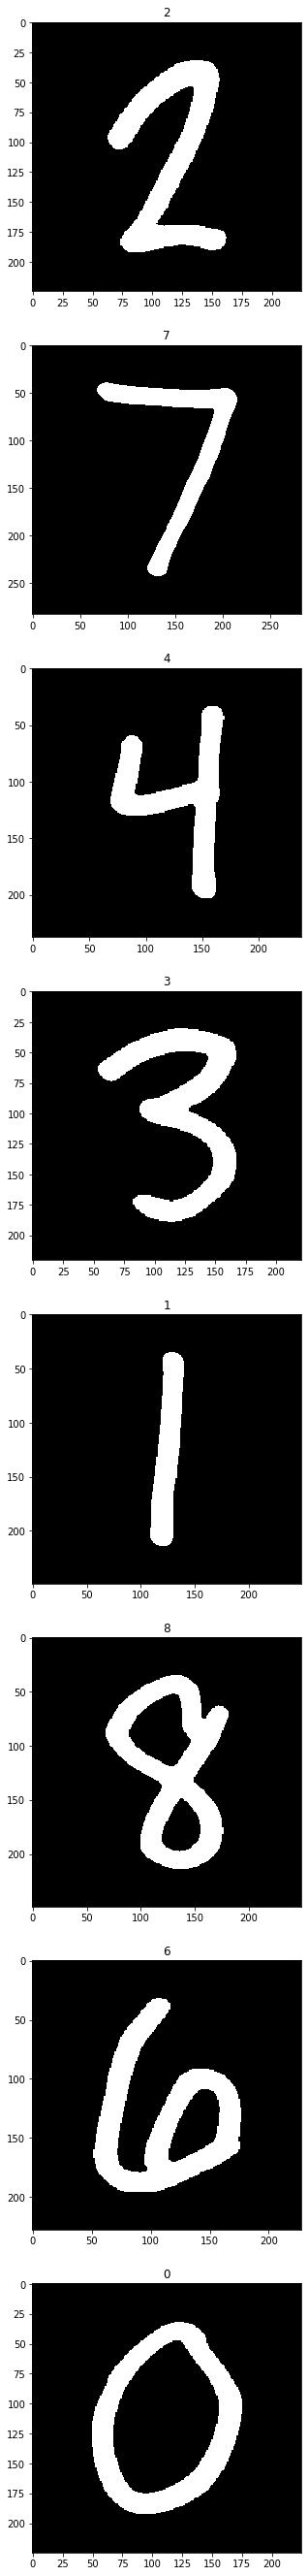

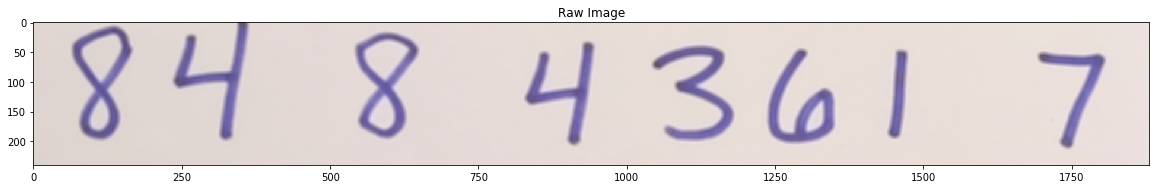

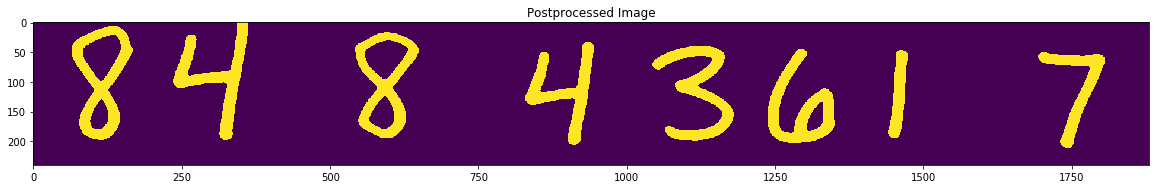

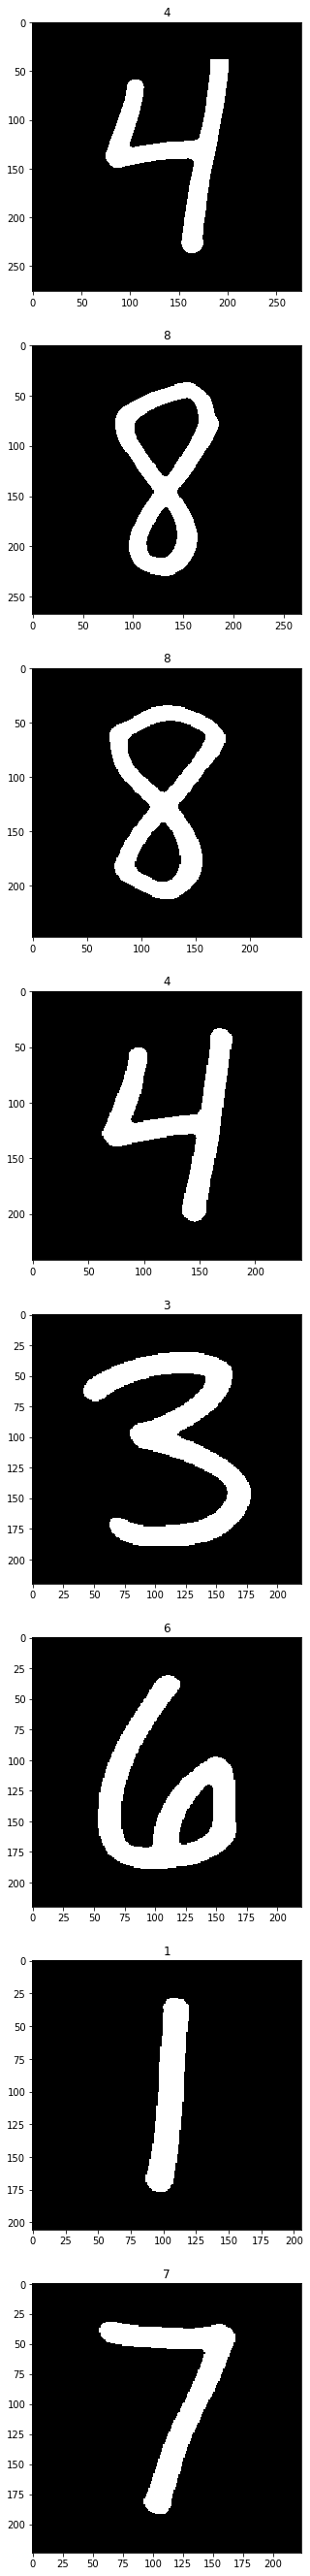

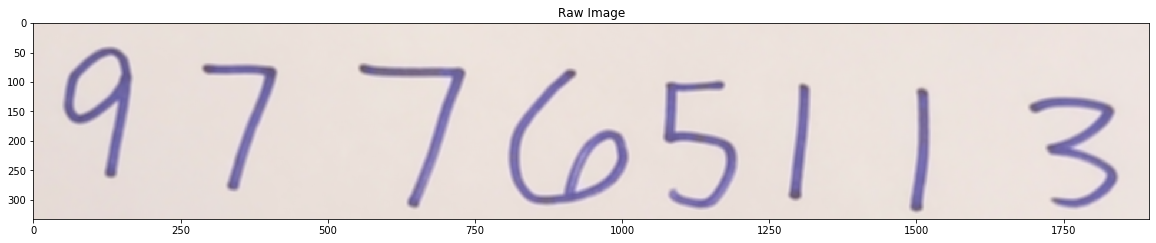

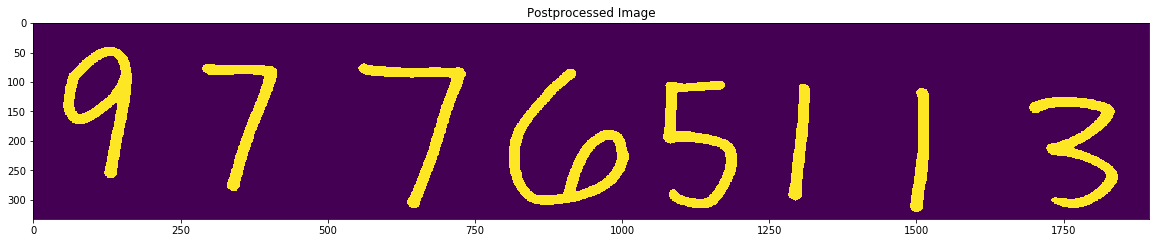

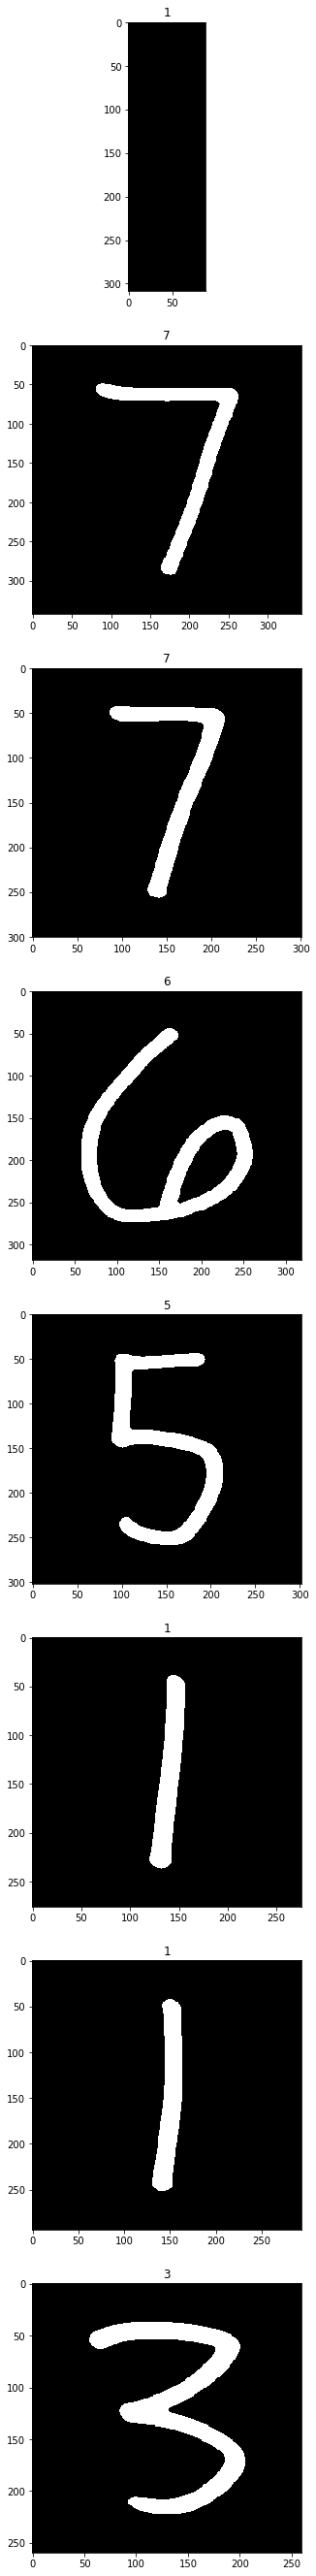

In [20]:
predictions = []
with open('yolotrain.txt','w') as writeFile:
    for index,image in enumerate(df_subset['filename']):
        matname = 'tf22_marker/HANDWRITING__'+image[-8:-4]
        print(index+1,'of',len(df_subset))
        print('processing ',image)
        binary_arr,label_arr, segments,orig = proc.label_segments(image,matname,photo=True,marker=False)
        
        predicted = []
        fig,axes = plt.subplots(len(segments),figsize=(6,6*len(segments)))
        for seg,ax in list(zip(segments,axes.flatten())):
            found = label_arr==seg
            x,y = np.where(found)
            xmin,xmax,ymin,ymax = np.min(x),np.max(x),np.min(y),np.max(y)
            xlen,ylen = found[xmin:xmax,ymin:ymax].shape
            diff = np.abs(ylen-xlen)
            change = ceil(diff/2)
            if diff!=0:
                if ylen>xlen:
                    xmin-=change
                    xmax+=change

                else:
                    ymin-=change
                    ymax+=change

                xlen,ylen = xmax-xmin,ymax-ymin
                diff=np.abs(ylen-xlen)
                if xlen>ylen: ymax+=diff
                elif ylen>xlen: xmax+=diff
            digit = binary_arr[xmin:xmax,ymin:ymax]
            digit = np.pad(digit,int(len(digit)*.2),mode= 'constant', constant_values=(0,0))        
            if digit.shape[0]<10:
                ax.set_visible(False)       
                pass
            else:
                ax.imshow(digit,cmap='gray')
                im = Image.fromarray(np.array(digit)*255.0).convert("RGB")
                im.save('000.jpg')
                img = cv2.resize(cv2.imread('000.jpg',cv2.IMREAD_GRAYSCALE),(28,28),interpolation=cv2.INTER_CUBIC)
                !rm 000.jpg
                p = np.argmax(tf_model.predict(img.astype(float).flatten().reshape((1, 28, 28, 1))))
                ax.set_title(p)
                im.save(matname+'___predicted____'+str(p)+'.jpg')
                predicted.append([ymin,p])

        predicted.sort()    
        predicted = [pr[1] for pr in predicted]

        row = str(df_subset.iloc[index]['label'])+'; '+str(list(predicted))+'\n'
        print(row)
        writeFile.write(row)
        predictions.append(predicted)
writeFile.close()


In [21]:
df_subset['predict'] = predictions
df_subset

filename                     label  \
0     testmarker/068479.jpg        [0, 6, 8, 4, 7, 9]   
1      testmarker/10645.jpg           [1, 0, 6, 4, 5]   
2   testmarker/10897649.jpg  [1, 0, 8, 9, 7, 6, 4, 9]   
3      testmarker/16786.jpg           [1, 6, 7, 8, 6]   
4   testmarker/17662814.jpg  [1, 7, 6, 6, 2, 8, 1, 4]   
5       testmarker/2185.jpg              [2, 1, 8, 5]   
6      testmarker/22069.jpg           [2, 2, 0, 6, 9]   
7      testmarker/22765.jpg           [2, 2, 7, 6, 5]   
8     testmarker/236951.jpg        [2, 3, 6, 9, 5, 1]   
9   testmarker/26635409.jpg  [2, 6, 6, 3, 5, 4, 0, 9]   
10    testmarker/279134.jpg        [2, 7, 9, 1, 3, 4]   
11  testmarker/32128957.jpg  [3, 2, 1, 2, 8, 9, 5, 7]   
12  testmarker/39385210.jpg  [3, 9, 3, 8, 5, 2, 1, 0]   
13  testmarker/46320745.jpg  [4, 6, 3, 2, 0, 7, 4, 5]   
14     testmarker/50473.jpg           [5, 0, 4, 7, 3]   
15    testmarker/648502.jpg        [6, 4, 8, 5, 0, 2]   
16    testmarker/657213.jpg        [6, 5, 7, 2, 1, 3]   
17     testmarker/66682.jpg           [6, 6, 6, 8, 2]   
18    testmarker/731984.jpg        [7, 3, 1, 9, 8, 4]   
19  testmarker/74036776.jpg  [7, 4, 0, 3, 6, 7, 7, 6]   
20     testmarker/74430.jpg           [7, 4, 4, 3, 0]   
21      testmarker/7493.jpg              [7, 4, 9, 3]   
22  testmarker/81064327.jpg  [8, 1, 0, 6, 4, 3, 2, 7]   
23  testmarker/84843617.jpg  [8, 4, 8, 4, 3, 6, 1, 7]   
24  testmarker/97765113.jpg  [9, 7, 7, 6, 5, 1, 1, 3]   

                     predict  
0      [0, 0, 6, 3, 4, 5, 7]  
1         [1, 0, 6, 4, 5, 6]  
2   [1, 0, 8, 9, 9, 6, 4, 9]  
3            [1, 6, 7, 8, 6]  
4   [1, 7, 6, 6, 2, 8, 1, 4]  
5      [4, 4, 2, 4, 1, 8, 5]  
6         [2, 0, 2, 0, 6, 9]  
7      [2, 2, 7, 0, 6, 0, 5]  
8         [1, 3, 6, 9, 5, 1]  
9   [2, 6, 6, 3, 5, 4, 0, 9]  
10        [2, 7, 4, 0, 3, 4]  
11  [3, 2, 1, 2, 8, 9, 5, 7]  
12  [3, 9, 3, 8, 5, 2, 1, 0]  
13  [4, 6, 3, 2, 0, 7, 4, 5]  
14           [5, 0, 4, 7, 3]  
15     [1, 4, 2, 6, 5, 0, 2]  
16        [6, 5, 7, 2, 1, 3]  
17        [6, 6, 6, 8, 2, 4]  
18        [7, 3, 1, 7, 8, 4]  
19  [7, 4, 0, 3, 6, 7, 7, 6]  
20        [7, 4, 4, 1, 3, 0]  
21              [7, 4, 9, 3]  
22  [8, 1, 0, 6, 4, 3, 2, 7]  
23  [8, 4, 8, 4, 3, 6, 1, 7]  
24  [1, 7, 7, 6, 5, 1, 1, 3]

In [22]:
df_subset['compare']= df_subset.label==df_subset.predict
df_subset['compare_sets']= [set(x)==set(y) for x,y in list(zip(df_subset.label,df_subset.predict))]
df_subset.compare.value_counts()

False    13
True     12
Name: compare, dtype: int64

In [63]:
def score_prediction(a1,b1):
    a=a1.copy()
    b=b1.copy()
    print(a,b)
    mishape=False
    if len(a)!=len(b):
        mishape=True
    over = len(a)
    score = 0

    for i in range(len(a)):
        print(a,b)
        if a[i]==b[i]:
            score+=1
            continue
        elif mishape:
            b.remove(b[i])
            if len(a)==len(b):
                mishape=False
            if a[i]==b[i]:
                score+=1
            else:
                pass

#     print(score,' of ',over)
#     print(a)
#     print(b)
    return score/over

In [ ]:
df_subset['score'] = [score_prediction(a,b) for a,b in list(zip(df_subset['label'],df_subset['predict']))]

In [72]:
df_subset

filename                     label  \
0     testmarker/068479.jpg        [0, 6, 8, 4, 7, 9]   
1      testmarker/10645.jpg           [1, 0, 6, 4, 5]   
2   testmarker/10897649.jpg  [1, 0, 8, 9, 7, 6, 4, 9]   
3      testmarker/16786.jpg           [1, 6, 7, 8, 6]   
4   testmarker/17662814.jpg  [1, 7, 6, 6, 2, 8, 1, 4]   
5       testmarker/2185.jpg              [2, 1, 8, 5]   
6      testmarker/22069.jpg           [2, 2, 0, 6, 9]   
7      testmarker/22765.jpg           [2, 2, 7, 6, 5]   
8     testmarker/236951.jpg        [2, 3, 6, 9, 5, 1]   
9   testmarker/26635409.jpg  [2, 6, 6, 3, 5, 4, 0, 9]   
10    testmarker/279134.jpg        [2, 7, 9, 1, 3, 4]   
11  testmarker/32128957.jpg  [3, 2, 1, 2, 8, 9, 5, 7]   
12  testmarker/39385210.jpg  [3, 9, 3, 8, 5, 2, 1, 0]   
13  testmarker/46320745.jpg  [4, 6, 3, 2, 0, 7, 4, 5]   
14     testmarker/50473.jpg           [5, 0, 4, 7, 3]   
15    testmarker/648502.jpg        [6, 4, 8, 5, 0, 2]   
16    testmarker/657213.jpg        [6, 5, 7, 2, 1, 3]   
17     testmarker/66682.jpg           [6, 6, 6, 8, 2]   
18    testmarker/731984.jpg        [7, 3, 1, 9, 8, 4]   
19  testmarker/74036776.jpg  [7, 4, 0, 3, 6, 7, 7, 6]   
20     testmarker/74430.jpg           [7, 4, 4, 3, 0]   
21      testmarker/7493.jpg              [7, 4, 9, 3]   
22  testmarker/81064327.jpg  [8, 1, 0, 6, 4, 3, 2, 7]   
23  testmarker/84843617.jpg  [8, 4, 8, 4, 3, 6, 1, 7]   
24  testmarker/97765113.jpg  [9, 7, 7, 6, 5, 1, 1, 3]   

                     predict  compare     score  
0      [0, 0, 6, 3, 4, 5, 7]    False  0.500000  
1         [1, 0, 6, 4, 5, 6]    False  1.000000  
2   [1, 0, 8, 9, 9, 6, 4, 9]    False  0.875000  
3            [1, 6, 7, 8, 6]     True  1.000000  
4   [1, 7, 6, 6, 2, 8, 1, 4]     True  1.000000  
5      [4, 4, 2, 4, 1, 8, 5]    False  0.500000  
6         [2, 0, 2, 0, 6, 9]    False  1.000000  
7      [2, 2, 7, 0, 6, 0, 5]    False  1.000000  
8         [1, 3, 6, 9, 5, 1]    False  0.833333  
9   [2, 6, 6, 3, 5, 4, 0, 9]     True  1.000000  
10        [2, 7, 4, 0, 3, 4]    False  0.666667  
11  [3, 2, 1, 2, 8, 9, 5, 7]     True  1.000000  
12  [3, 9, 3, 8, 5, 2, 1, 0]     True  1.000000  
13  [4, 6, 3, 2, 0, 7, 4, 5]     True  1.000000  
14           [5, 0, 4, 7, 3]     True  1.000000  
15     [1, 4, 2, 6, 5, 0, 2]    False  0.500000  
16        [6, 5, 7, 2, 1, 3]     True  1.000000  
17        [6, 6, 6, 8, 2, 4]    False  1.000000  
18        [7, 3, 1, 7, 8, 4]    False  0.833333  
19  [7, 4, 0, 3, 6, 7, 7, 6]     True  1.000000  
20        [7, 4, 4, 1, 3, 0]    False  1.000000  
21              [7, 4, 9, 3]     True  1.000000  
22  [8, 1, 0, 6, 4, 3, 2, 7]     True  1.000000  
23  [8, 4, 8, 4, 3, 6, 1, 7]     True  1.000000  
24  [1, 7, 7, 6, 5, 1, 1, 3]    False  0.875000

In [25]:
im = np.array(imgs)[df_subset.compare]

testmarker/84843617.jpg
 0.41041666666666665 0.15895800106326421 0.8208333333333333 0.06698564593301436
 0.42291666666666666 0.06166932482721956 0.7958333333333333 0.05422647527910686
 0.4395833333333333 0.3168527379053695 0.7375 0.05635300372142477
 0.4979166666666667 0.4715576820839979 0.7208333333333333 0.06166932482721956
 0.49583333333333335 0.5911749069643807 0.6583333333333333 0.07230196703880915
 0.5145833333333333 0.6879319510898458 0.6541666666666667 0.05954279638490165
 0.5020833333333333 0.7745879851143009 0.6125 0.01701222753854333
 0.5458333333333333 0.9303561935140883 0.6666666666666666 0.05954279638490165


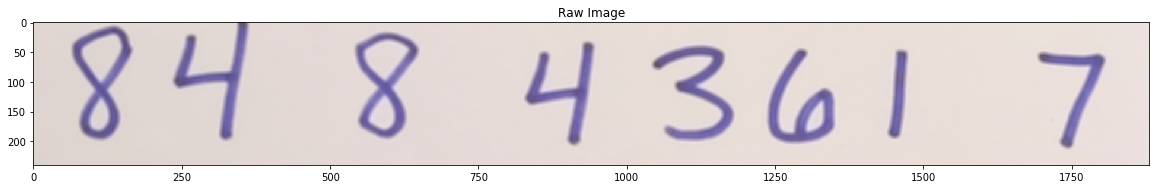

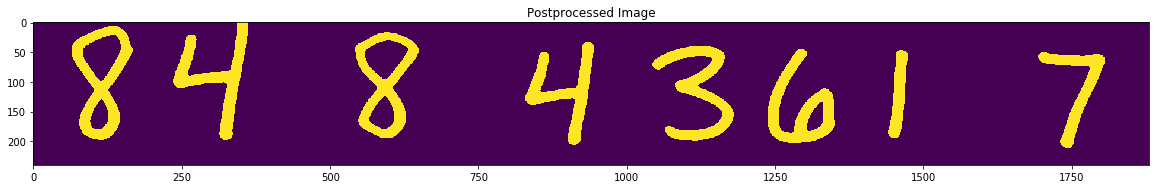

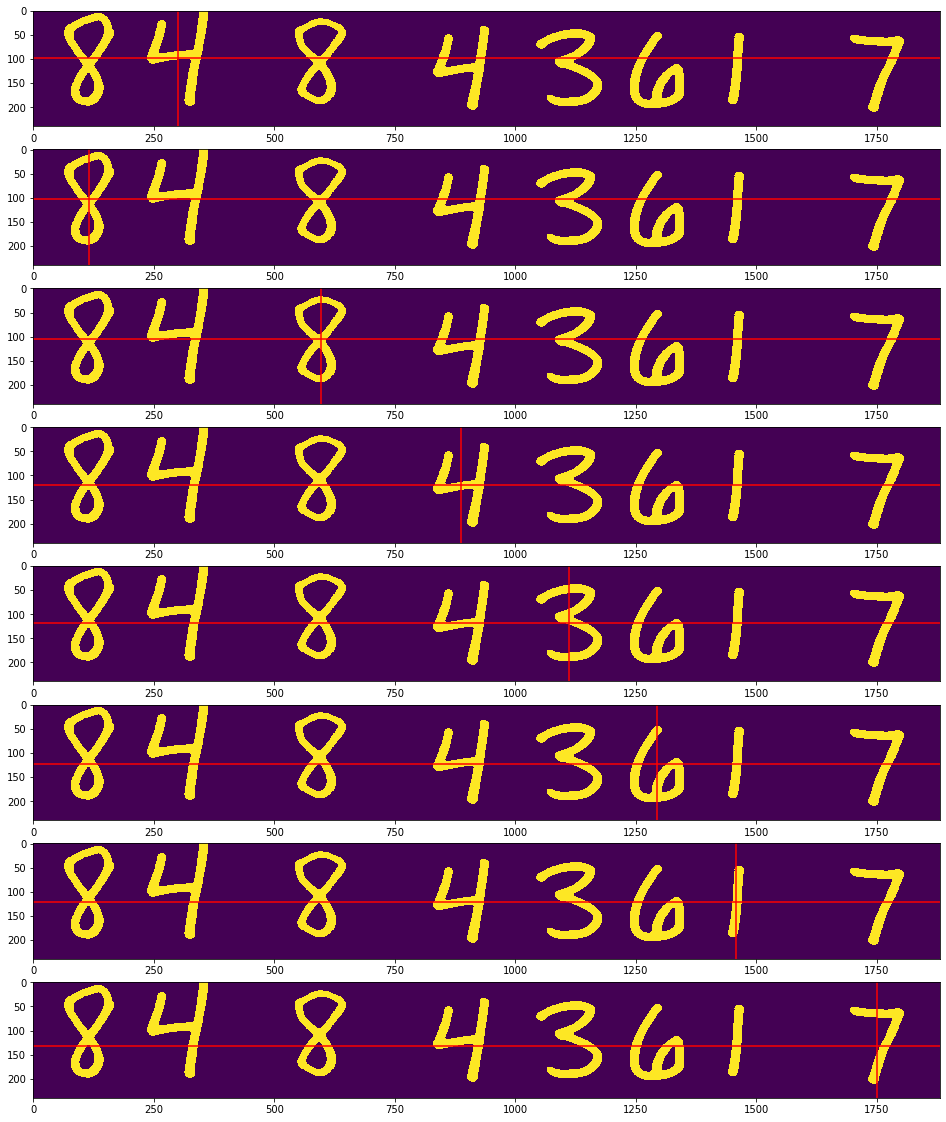

In [40]:
image = im[11]
print(image)
binary_arr,label_arr, segments,orig = proc.label_segments(image,matname,photo=True,marker=False)
n=len(segments)
fig,axes = plt.subplots(n,figsize=(6*n,20))
for i,seg in enumerate(segments):
    x_center, y_center, xlen, ylen = newproc.crop_image(seg, label_arr, binary_arr,ax=axes[i])
    print('',x_center, y_center, xlen, ylen)
    # plt.imshow(arr)
    # plt.axhline(x_center*x_height,color='r')
    # plt.axvline(y_center*y_height,color='r');